In [1]:
!pip install -U silence_tensorflow pennylane==0.34.0 tensorflow==2.14.0 numpy scipy
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 2.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 67.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 34.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 78.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 68.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 92.8 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 79.5 MB/s eta 0:00:00
  Preparing metadata (s

In [1]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [3]:
# Check if GPU is available
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT available")

# Check which GPU TensorFlow is using
print("TensorFlow is using", tf.test.gpu_device_name())

GPU is available
TensorFlow is using /device:GPU:0


In [4]:
import os
import urllib.request
import zipfile

# Turn off TensorFlow warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import warnings
warnings.filterwarnings("ignore")

# dir_data = '/content/data/'
# if not os.path.isdir(dir_data):
#     os.makedirs(dir_data, exist_ok=True)

# # URLs to download the files
# urls = [
#     'https://ngdc.noaa.gov/geomag/data/geomag/magnet/public.zip',
#     'https://ngdc.noaa.gov/geomag/data/geomag/magnet/private.zip'
# ]

# # Function to download and unzip files
# def download_and_extract(url, extract_to):
#     zip_path = os.path.join(extract_to, os.path.basename(url))
#     print(f'Downloading {url}')
#     urllib.request.urlretrieve(url, zip_path)
#     print(f'Unzipping {zip_path}')
#     with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#         zip_ref.extractall(extract_to)
#     os.remove(zip_path)
#     print(f'Finished extracting {url}\n')

# # Download and extract each file
# for url in urls:
#     download_and_extract(url, dir_data)

# # Print list of data files
# print('\nData files for input (features) and output Dst (labels):')
# for dir_pubpriv in ['public/', 'private/']:
#     print(os.path.join(dir_data, dir_pubpriv))
#     for path, dirs, files in os.walk(os.path.join(dir_data, dir_pubpriv)):
#         for f in files:
#             print('\t', f)


In [2]:
# Modules we need to get started and Matplotlib configuration:
import numpy as np, pandas as pd, pprint
import matplotlib.pyplot as plt

# The next two lines are nice for Jupyter, but not available for Colab:
#%load_ext nb_black
#%matplotlib inline

# Matplotlib Configuration
import matplotlib.pyplot as plt
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 14}
plt.rc('font', **font)

#### Import  Input (Features) and Output (Labels) as Pandas DataFrames
<div class="alert alert-block alert-info">
<b>Info:</b> As described above, the input data is a time series of solar wind measurements at L1 along with sunspot number, and the output data is a time series of <i>Dst</i>. Recall that for the past competition, the competitors did not have the real geophysical date/time. So here, we will recreate a new column of real geophysical date/time from our timedelta and the table shown in "Data Summary".
</div>

In [3]:
# From our time range table in the "Data Summary" section:
period_ranges = {
    'period_1':[pd.Timestamp('1998/2/16 00:00:00'), pd.Timestamp('2001/5/31  23:59:00')],
    'period_2':[pd.Timestamp('2013/6/1  00:00:00'), pd.Timestamp('2019/5/31  23:59:00')],
    'period_3':[pd.Timestamp('2004/5/1  00:00:00'), pd.Timestamp('2010/12/31 23:59:00')],
    'period_4' :[pd.Timestamp('2001/6/1  00:00:00'), pd.Timestamp('2004/4/30  23:59:00')],
    'period_5' :[pd.Timestamp('2011/1/1  00:00:00'), pd.Timestamp('2013/5/31  23:59:00')],
    'period_6' :[pd.Timestamp('2019/6/1  00:00:00'), pd.Timestamp('2020/10/31 23:59:00')]}

def convert_timedelta_to_datetime( df ):
    """Adds real geophysical datetimes to our DataFrame using the original "index" timestamps.

    The relative "index" timestamps were used in the MagNet competition datasets since all of the data
    were in the public domain.

    Parameters
    ----------
    df: pd.DataFrame
        Includes index time

    Returns
    -------
    df_datetimes: pd.DataFrame
        Adds datetimes to the input pd.DataFrame
    """
    df_datetimes = pd.DataFrame(index=df.index)
    df_datetimes['datetime'] = pd.NaT     # like Numpy NaN

    i = 0
    for period_name, timedelta in df.index:
        start_time = period_ranges[period_name][0]
        datetime = timedelta + start_time                 # add Pandas Timedelta to Pandas Timestamp
        df_datetimes['datetime'].values[i] = datetime
        i += 1

        #print('%s: %s + %s = %s' % (period_name, timedelta, start_time, df['datetime'].values[i]))

    return df_datetimes

In [4]:
# Assuming you have your DataFrame as df
# Create a dictionary to map the old values to the new ones
mapping = {
    'train_a': 'period_1',
    'train_b': 'period_2',
    'train_c': 'period_3',
    'test_a': 'period_4',
    'test_b': 'period_5',
    'test_c': 'period_6',
    # Add more mappings for other train types if needed
}

In [5]:
# Import as Pandas DataFrames
from pathlib import Path
DATA_PATH = Path("/kaggle/input/noaa-public/")

print('Reading in the Dst output data...')
dst = pd.read_csv(DATA_PATH / "dst_labels.csv")
dst['period'] = dst['period'].map(mapping)
dst.timedelta = pd.to_timedelta(dst.timedelta)
dst.set_index(["period", "timedelta"], inplace=True)

print('Reading in the Sunspot input data...')
sunspots = pd.read_csv(DATA_PATH / "sunspots.csv")
sunspots['period'] = sunspots['period'].map(mapping)
sunspots.timedelta = pd.to_timedelta(sunspots.timedelta)
sunspots.set_index(["period", "timedelta"], inplace=True)

print('Reading in the Solarwind input data...')
solar_wind = pd.read_csv(DATA_PATH / "solar_wind.csv")
solar_wind['period'] = solar_wind['period'].map(mapping)
solar_wind.timedelta = pd.to_timedelta(solar_wind.timedelta)
solar_wind.set_index(["period", "timedelta"], inplace=True)

print('Reading in the Satellite position input data...')
satellite_positions = pd.read_csv(DATA_PATH / "satellite_positions.csv")
satellite_positions['period'] = satellite_positions['period'].map(mapping)
satellite_positions.timedelta = pd.to_timedelta(satellite_positions.timedelta)
satellite_positions.set_index(["period", "timedelta"], inplace=True)


Reading in the Dst output data...
Reading in the Sunspot input data...
Reading in the Solarwind input data...
Reading in the Satellite position input data...


In [6]:
# Real Event Data that was previously held back from the competitors
DATA_PATH2 = Path("/kaggle/input/noaa-private/")
print('Importing data from: %s' % DATA_PATH)

print('Reading in the Dst output data...')
dst2 = pd.read_csv(DATA_PATH2 / "dst_labels.csv")
dst2['period'] = dst2['period'].map(mapping)
dst2.timedelta = pd.to_timedelta(dst2.timedelta)
dst2.set_index(["period", "timedelta"], inplace=True)

print('Reading in the Sunspot input data...')
sunspots2 = pd.read_csv(DATA_PATH2 / "sunspots.csv")
sunspots2['period'] = sunspots2['period'].map(mapping)
sunspots2.timedelta = pd.to_timedelta(sunspots2.timedelta)
sunspots2.set_index(["period", "timedelta"], inplace=True)

print('Reading in the Solarwind input data...')
solar_wind2 = pd.read_csv(DATA_PATH2 / "solar_wind.csv")
solar_wind2['period'] = solar_wind2['period'].map(mapping)
solar_wind2.timedelta = pd.to_timedelta(solar_wind2.timedelta)
solar_wind2.set_index(["period", "timedelta"], inplace=True)

print('Reading in the Satellite position input data...')
satellite_positions2 = pd.read_csv(DATA_PATH2 / "satellite_positions.csv")
satellite_positions2['period'] = satellite_positions2['period'].map(mapping)
satellite_positions2.timedelta = pd.to_timedelta(satellite_positions2.timedelta)
satellite_positions2.set_index(["period", "timedelta"], inplace=True)

Importing data from: /kaggle/input/noaa-public
Reading in the Dst output data...
Reading in the Sunspot input data...
Reading in the Solarwind input data...
Reading in the Satellite position input data...


In [7]:
print("Dst shape: ", dst.shape)
dst.head()

Dst shape:  (139872, 1)


dst
period   timedelta           
period_1 0 days 00:00:00   -7
         0 days 01:00:00  -10
         0 days 02:00:00  -10
         0 days 03:00:00   -6
         0 days 04:00:00   -2

In [8]:
dst.groupby("period").describe()

dst                                                    
            count       mean        std    min   25%   50%  75%   max
period                                                               
period_1  28824.0 -16.576707  26.083191 -387.0 -26.0 -12.0 -1.0  65.0
period_2  52584.0  -9.695154  16.443049 -223.0 -17.0  -7.0  1.0  59.0
period_3  58464.0  -9.556325  16.506404 -374.0 -16.0  -7.0  0.0  67.0

In [9]:
print("Solar wind shape: ", solar_wind.shape)
solar_wind.head()

Solar wind shape:  (8392320, 15)


bx_gse  by_gse  bz_gse  theta_gse  phi_gse  bx_gsm  \
period   timedelta                                                             
period_1 0 days 00:00:00   -5.55    3.00    1.25      11.09   153.37   -5.55   
         0 days 00:01:00   -5.58    3.16    1.17      10.10   151.91   -5.58   
         0 days 00:02:00   -5.15    3.66    0.85       7.87   146.04   -5.15   
         0 days 00:03:00   -5.20    3.68    0.68       6.17   146.17   -5.20   
         0 days 00:04:00   -5.12    3.68    0.49       4.62   145.72   -5.12   

                          by_gsm  bz_gsm  theta_gsm  phi_gsm    bt  density  \
period   timedelta                                                            
period_1 0 days 00:00:00    3.00    1.25      11.09   153.37  6.80     1.53   
         0 days 00:01:00    3.16    1.17      10.10   151.91  6.83     1.69   
         0 days 00:02:00    3.66    0.85       7.87   146.04  6.77     1.97   
         0 days 00:03:00    3.68    0.68       6.17   146.17  6.74     1.97   
         0 days 00:04:00    3.68    0.49       4.62   145.72  6.65     1.77   

                           speed  temperature source  
period   timedelta                                    
period_1 0 days 00:00:00  383.92     110237.0     ac  
         0 days 00:01:00  381.79     123825.0     ac  
         0 days 00:02:00  389.11      82548.0     ac  
         0 days 00:03:00  389.11      82548.0     ac  
         0 days 00:04:00  384.26      94269.0     ac

In [10]:
print("Sunspot shape: ", sunspots.shape)
sunspots.head()

Sunspot shape:  (192, 1)


smoothed_ssn
period   timedelta              
period_1 0 days             65.4
         13 days            72.0
         44 days            76.9
         74 days            80.8
         105 days           85.4

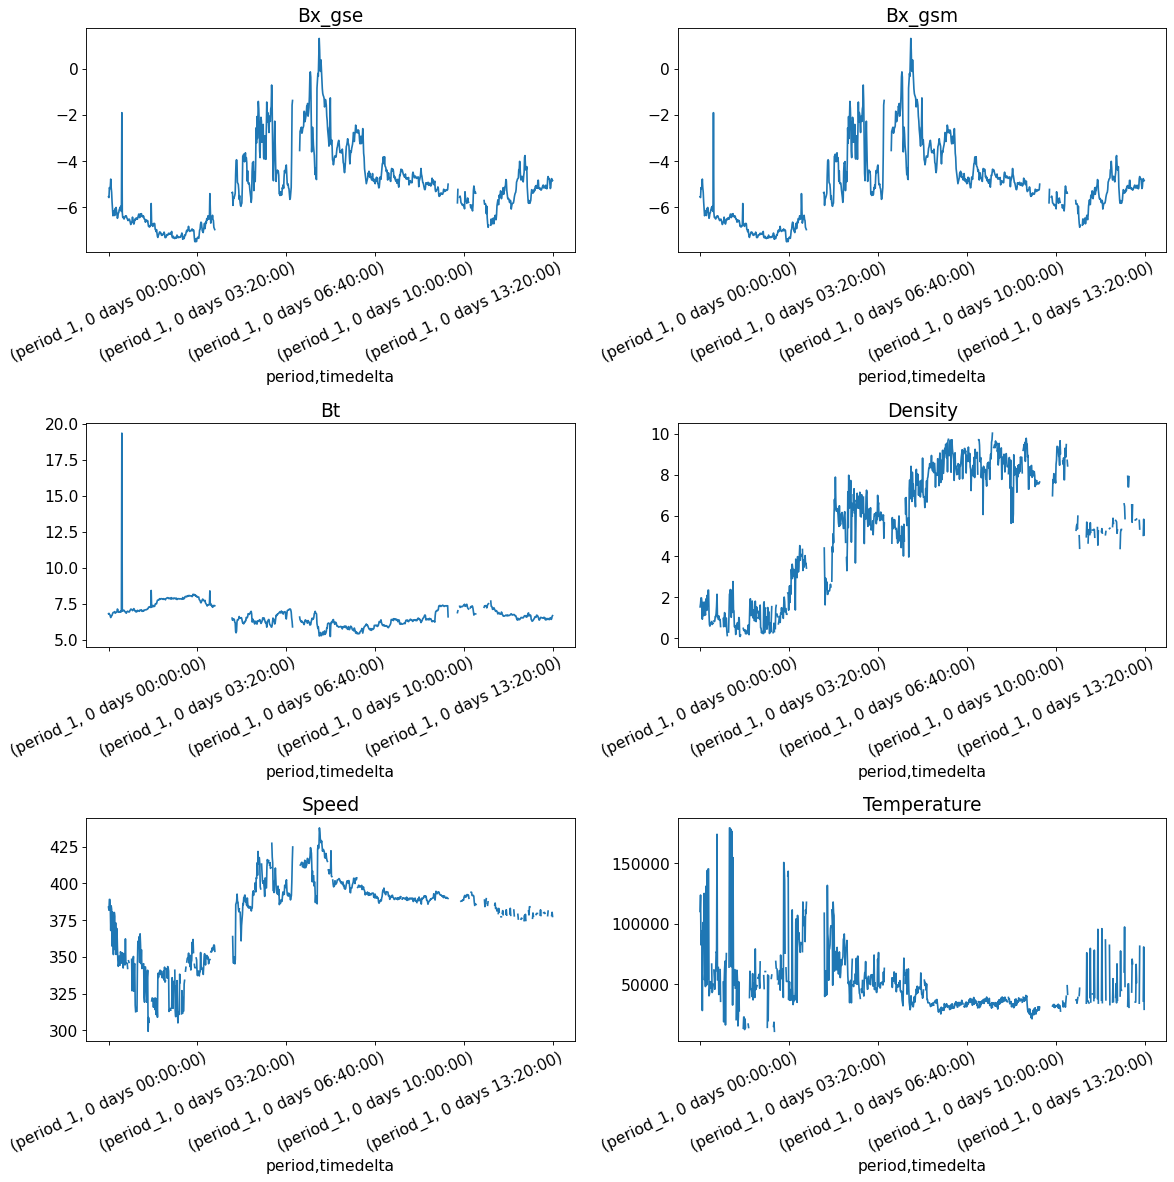

In [11]:
import matplotlib.pyplot as plt

def show_raw_visualization(data, filename="visualization.png"):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15), dpi=80)
    for i, key in enumerate(data.columns):
        t_data = data[key]
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            title=f"{key.capitalize()}",
            rot=25,
        )

    fig.subplots_adjust(hspace=0.8)
    plt.tight_layout()
    plt.savefig(filename)  # Save the figure to a file
    plt.show()  # Optionally show the plot

cols_to_plot = ["bx_gse", "bx_gsm", "bt", "density", "speed", "temperature"]
show_raw_visualization(solar_wind[cols_to_plot].iloc[:1000], filename="solar_wind_visualization.png")


In [12]:
solar_wind.join(sunspots).join(dst)

bx_gse  by_gse  bz_gse  theta_gse  phi_gse  \
period   timedelta                                                        
period_1 0 days 00:00:00      -5.55    3.00    1.25      11.09   153.37   
         0 days 00:01:00      -5.58    3.16    1.17      10.10   151.91   
         0 days 00:02:00      -5.15    3.66    0.85       7.87   146.04   
         0 days 00:03:00      -5.20    3.68    0.68       6.17   146.17   
         0 days 00:04:00      -5.12    3.68    0.49       4.62   145.72   
...                             ...     ...     ...        ...      ...   
period_3 2435 days 23:55:00   -1.18    2.00   -3.92     -59.28   120.51   
         2435 days 23:56:00   -1.34    2.12   -3.83     -56.78   122.23   
         2435 days 23:57:00   -1.62    2.33   -3.63     -51.98   124.76   
         2435 days 23:58:00   -2.27    2.48   -3.22     -43.81   132.50   
         2435 days 23:59:00   -2.15    2.41   -3.30     -45.55   131.76   

                             bx_gsm  by_gsm  bz_gsm  theta_gsm  phi_gsm    bt  \
period   timedelta                                                              
period_1 0 days 00:00:00      -5.55    3.00    1.25      11.09   153.37  6.80   
         0 days 00:01:00      -5.58    3.16    1.17      10.10   151.91  6.83   
         0 days 00:02:00      -5.15    3.66    0.85       7.87   146.04  6.77   
         0 days 00:03:00      -5.20    3.68    0.68       6.17   146.17  6.74   
         0 days 00:04:00      -5.12    3.68    0.49       4.62   145.72  6.65   
...                             ...     ...     ...        ...      ...   ...   
period_3 2435 days 23:55:00   -1.17    2.98   -3.23     -45.24   111.48  4.56   
         2435 days 23:56:00   -1.33    3.08   -3.12     -42.95   113.45  4.58   
         2435 days 23:57:00   -1.61    3.22   -2.87     -38.57   116.58  4.61   
         2435 days 23:58:00   -2.26    3.25   -2.44     -31.61   124.81  4.65   
         2435 days 23:59:00   -2.15    3.21   -2.53     -33.21   123.75  4.62   

                             density   speed  temperature source  \
period   timedelta                                                 
period_1 0 days 00:00:00        1.53  383.92     110237.0     ac   
         0 days 00:01:00        1.69  381.79     123825.0     ac   
         0 days 00:02:00        1.97  389.11      82548.0     ac   
         0 days 00:03:00        1.97  389.11      82548.0     ac   
         0 days 00:04:00        1.77  384.26      94269.0     ac   
...                              ...     ...          ...    ...   
period_3 2435 days 23:55:00     4.64  348.73      23368.0     ac   
         2435 days 23:56:00     4.27  346.36      26497.0     ac   
         2435 days 23:57:00     3.95  344.12      27050.0     ac   
         2435 days 23:58:00     2.81  338.52      33257.0     ac   
         2435 days 23:59:00     2.30  342.31      32267.0     ac   

                             smoothed_ssn  dst  
period   timedelta                              
period_1 0 days 00:00:00             65.4 -7.0  
         0 days 00:01:00              NaN  NaN  
         0 days 00:02:00              NaN  NaN  
         0 days 00:03:00              NaN  NaN  
         0 days 00:04:00              NaN  NaN  
...                                   ...  ...  
period_3 2435 days 23:55:00           NaN  NaN  
         2435 days 23:56:00           NaN  NaN  
         2435 days 23:57:00           NaN  NaN  
         2435 days 23:58:00           NaN  NaN  
         2435 days 23:59:00           NaN  NaN  

[8392320 rows x 17 columns]

In [13]:
solar_wind2.join(sunspots).join(dst)

bx_gse  by_gse  bz_gse  theta_gse  phi_gse  \
period   timedelta                                                       
period_4 0 days 00:00:00     -3.35    3.44   -1.01     -11.91   134.18   
         0 days 00:01:00     -2.98    3.59   -1.04     -12.52   129.71   
         0 days 00:02:00     -3.29    3.46   -1.04     -12.33   133.54   
         0 days 00:03:00     -3.39    3.44   -0.79      -9.29   134.57   
         0 days 00:04:00     -3.28    3.52   -0.86     -10.13   132.99   
...                            ...     ...     ...        ...      ...   
period_6 518 days 23:55:00   -3.35   -2.14    2.85      35.69   212.55   
         518 days 23:56:00   -2.39    0.21    1.45      31.07   174.91   
         518 days 23:57:00   -0.78    2.75   -0.39      -7.73   105.85   
         518 days 23:58:00   -0.23    3.71   -0.93     -14.01    93.58   
         518 days 23:59:00    0.12    3.97   -0.17      -2.47    88.26   

                            bx_gsm  by_gsm  bz_gsm  theta_gsm  phi_gsm    bt  \
period   timedelta                                                             
period_4 0 days 00:00:00     -3.35    3.59    0.14       1.65   133.00  4.91   
         0 days 00:01:00     -2.98    3.73    0.17       1.98   128.61  4.78   
         0 days 00:02:00     -3.29    3.62    0.12       1.34   132.29  4.89   
         0 days 00:03:00     -3.39    3.51    0.35       4.09   133.97  4.89   
         0 days 00:04:00     -3.28    3.61    0.31       3.59   132.26  4.88   
...                            ...     ...     ...        ...      ...   ...   
period_6 518 days 23:55:00   -3.35   -1.64    3.16      40.32   206.13  4.89   
         518 days 23:56:00   -2.39    0.45    1.39      29.78   169.42  3.01   
         518 days 23:57:00   -0.78    2.65   -0.83     -16.78   106.42  2.96   
         518 days 23:58:00   -0.23    3.51   -1.52     -23.43    93.78  3.86   
         518 days 23:59:00    0.12    3.89   -0.82     -11.91    88.23  3.98   

                            density   speed  temperature source  smoothed_ssn  \
period   timedelta                                                              
period_4 0 days 00:00:00       5.57  338.59      41313.0     ac           NaN   
         0 days 00:01:00       5.66  339.11      37388.0     ac           NaN   
         0 days 00:02:00       4.95  337.70      35715.0     ac           NaN   
         0 days 00:03:00       4.96  338.41      38214.0     ac           NaN   
         0 days 00:04:00       5.35  336.63      40458.0     ac           NaN   
...                             ...     ...          ...    ...           ...   
period_6 518 days 23:55:00     4.64  388.30     111784.0     ds           NaN   
         518 days 23:56:00     5.35  390.90     123559.0     ds           NaN   
         518 days 23:57:00     5.63  411.60     120740.0     ds           NaN   
         518 days 23:58:00     5.65  416.60     100777.0     ds           NaN   
         518 days 23:59:00     5.93  415.80      89069.0     ds           NaN   

                            dst  
period   timedelta               
period_4 0 days 00:00:00    NaN  
         0 days 00:01:00    NaN  
         0 days 00:02:00    NaN  
         0 days 00:03:00    NaN  
         0 days 00:04:00    NaN  
...                         ...  
period_6 518 days 23:55:00  NaN  
         518 days 23:56:00  NaN  
         518 days 23:57:00  NaN  
         518 days 23:58:00  NaN  
         518 days 23:59:00  NaN  

[3551040 rows x 17 columns]

In [14]:
solar_wind.drop('source',axis=1, inplace=True)
solar_wind2.drop('source',axis=1, inplace=True)

### Feature Generation

#### Set seeds for reproducibility

In [15]:
from numpy.random import seed
from tensorflow.random import set_seed

seed(2020)
set_seed(2021)

#### Feature / Input Data we'll use to Train the Model

<div class="alert alert-block alert-info">
<b>Info: </b> It's good to think about what features we'd recommend for use in developing our model. An additional exercise at the end of this notebook has learners try different sets of features. You can do so simply by adjusting the "SOLAR_WIND_FEATURES" list below.
</div>

In [16]:
import numpy as np
from sklearn.preprocessing import StandardScaler,power_transform
from sklearn.impute import  SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import PowerTransformer
# subset of solar wind features to use for modeling
SOLAR_WIND_FEATURES = [
    "bt",
    "temperature",
    "bx_gse",
    "by_gse",
    "bz_gse",
    "phi_gse",
    "theta_gse",
    "bx_gsm",
    "by_gsm",
    "bz_gsm",
    "phi_gsm",
    "theta_gsm",
    "speed",
    "density",
]

In [17]:
# The model will be built on feature statistics, mean and standard deviation
# all of the features we'll use, including sunspot numbers
XCOLS = (
    [col + "_mean" for col in SOLAR_WIND_FEATURES]
    + [col + "_std" for col in SOLAR_WIND_FEATURES]
    + ["smoothed_ssn"]
)

<div class="alert alert-block alert-info">
<b>Info: </b>As discussed above, we'll need to fill in gaps and create statistical summaries (hourly means and standard deviations) of our features before modeling. The following routines provide this "preprocessing" functionality of gap filling, and scaling by features' statistics.
</div>

In [18]:
from sklearn.preprocessing import StandardScaler

def impute_features(feature_df, imp = None):
    """Imputes data using the following methods:
    - `smoothed_ssn`: forward fill
    - `solar_wind`: interpolation
    """
    # forward fill sunspot data for the rest of the month
    feature_df.smoothed_ssn = feature_df.smoothed_ssn.fillna(method="ffill")
    # missing solar wind values imputation using most-frequent strategy
    feature_df=feature_df.reset_index()
    cols = feature_df.columns[2:]
    if imp == None:
        imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        imp.fit(feature_df[cols])
    temp = imp.transform(feature_df[cols])
    feature_df[cols] = temp
    feature_df.timedelta = pd.to_timedelta(feature_df.timedelta)
    feature_df.set_index(["period", "timedelta"], inplace=True)
    return feature_df , imp


def aggregate_hourly(feature_df, aggs=["mean", "std"]):
    """Aggregates features to the floor of each hour using mean and standard deviation.
    e.g. All values from "11:00:00" to "11:59:00" will be aggregated to "11:00:00".
    """
    # group by the floor of each hour use timedelta index
    agged = feature_df.groupby(
        ["period", feature_df.index.get_level_values(1).floor("H")]
    ).agg(aggs)
    # flatten hierachical column index
    agged.columns = ["_".join(x) for x in agged.columns]
    return agged


def preprocess_features(solar_wind, sunspots, scaler=None,imputer=None, subset=None):
    """
    Preprocessing steps:
        - Subset the data
        - Aggregate hourly
        - Join solar wind and sunspot data
        - Scale using standard scaler
        - Impute missing values
    """
    # select features we want to use
    if subset:
        solar_wind = solar_wind[subset]
    # aggregate solar wind data and join with sunspots

    hourly_features = aggregate_hourly(solar_wind).join(sunspots)

    # subtract mean and divide by standard deviation
    if scaler is None:
        scaler = StandardScaler()
        scaler.fit(hourly_features)

    normalized = pd.DataFrame(
        scaler.transform(hourly_features),
        index=hourly_features.index,
        columns=hourly_features.columns,
    )

    # impute missing values
    imputed, imp = impute_features(normalized,imputer)

    # we want to return the scaler object as well to use later during prediction
    return imputed, scaler, imp

In [19]:
features, scaler, imputer = preprocess_features(solar_wind, sunspots , subset=SOLAR_WIND_FEATURES)
print(features.shape)
# check to make sure missing values are filled
assert (features.isna().sum() == 0).all()
features.head()

(139872, 29)


bt_mean    bt_std  temperature_mean  \
period   timedelta                                               
period_1 0 days 00:00:00  0.499705  2.443614         -0.375267   
         0 days 01:00:00  0.547177 -0.224580         -0.479430   
         0 days 02:00:00  0.739905 -0.770240         -0.574831   
         0 days 03:00:00  0.699098 -0.278783         -0.324709   
         0 days 04:00:00  0.223933 -0.225168         -0.313432   

                          temperature_std  bx_gse_mean  bx_gse_std  \
period   timedelta                                                   
period_1 0 days 00:00:00         0.383941    -1.599207   -0.381502   
         0 days 01:00:00         0.953178    -1.757995   -0.867747   
         0 days 02:00:00        -0.192518    -1.912116   -1.114317   
         0 days 03:00:00         0.325491    -1.809045   -0.783042   
         0 days 04:00:00         0.201600    -1.338802   -0.484910   

                          by_gse_mean  by_gse_std  bz_gse_mean  bz_gse_std  \
period   timedelta                                                           
period_1 0 days 00:00:00     0.419516    0.031658     0.300358   -0.651645   
         0 days 01:00:00     0.179257   -0.272971     0.446103   -0.517913   
         0 days 02:00:00     0.183266   -0.822786     0.770174   -0.876490   
         0 days 03:00:00    -0.378111    0.341156     0.621194   -0.290211   
         0 days 04:00:00     0.072745    1.023019     0.467629   -0.478080   

                          ...  bz_gsm_std  phi_gsm_mean  phi_gsm_std  \
period   timedelta        ...                                          
period_1 0 days 00:00:00  ...   -0.645095     -0.368627    -0.720724   
         0 days 01:00:00  ...   -0.511040     -0.255717    -0.752218   
         0 days 02:00:00  ...   -0.870482     -0.254145    -0.868503   
         0 days 03:00:00  ...   -0.282789     -0.049648    -0.638287   
         0 days 04:00:00  ...   -0.471111     -0.238606    -0.387514   

                          theta_gsm_mean  theta_gsm_std  speed_mean  \
period   timedelta                                                    
period_1 0 days 00:00:00        0.247927      -1.144826   -0.738546   
         0 days 01:00:00        0.358697      -1.052803   -0.986904   
         0 days 02:00:00        0.576426      -1.392092   -1.013548   
         0 days 03:00:00        0.466099      -0.902858   -0.826469   
         0 days 04:00:00        0.442384      -0.906160   -0.601238   

                          speed_std  density_mean  density_std  smoothed_ssn  
period   timedelta                                                            
period_1 0 days 00:00:00   0.862524     -0.775827    -0.205724      0.139444  
         0 days 01:00:00   0.995063     -0.861692    -0.058215      0.139444  
         0 days 02:00:00   0.554085     -0.846222    -0.220012      0.139444  
         0 days 03:00:00  -0.211185     -0.404306     0.218373      0.139444  
         0 days 04:00:00   1.016033     -0.371487     0.097253      0.139444  

[5 rows x 29 columns]

In [20]:
features2, scaler2, imputer2 = preprocess_features(solar_wind2, sunspots2 , subset=SOLAR_WIND_FEATURES)
print(features2.shape)
# check to make sure missing values are filled
assert (features2.isna().sum() == 0).all()
features2.head()

(59184, 29)


bt_mean    bt_std  temperature_mean  \
period   timedelta                                               
period_4 0 days 00:00:00 -0.311506 -0.166852         -0.670084   
         0 days 01:00:00 -0.257180 -0.121644         -0.633529   
         0 days 02:00:00 -0.113797 -0.179912         -0.626987   
         0 days 03:00:00  0.007134 -0.614577         -0.627023   
         0 days 04:00:00 -0.042030 -0.260113         -0.553776   

                          temperature_std  bx_gse_mean  bx_gse_std  \
period   timedelta                                                   
period_4 0 days 00:00:00        -0.546331    -0.758075   -0.583824   
         0 days 01:00:00        -0.547793    -0.788477   -0.357912   
         0 days 02:00:00        -0.484512    -1.043192   -0.444493   
         0 days 03:00:00        -0.582198    -1.176432   -0.991267   
         0 days 04:00:00        -0.488325    -1.217805   -0.620529   

                          by_gse_mean  by_gse_std  bz_gse_mean  bz_gse_std  \
period   timedelta                                                           
period_4 0 days 00:00:00     0.905309   -0.281836    -0.151684   -0.259802   
         0 days 01:00:00     0.690187   -0.521750    -0.809125   -0.538097   
         0 days 02:00:00     0.844946   -0.416686    -0.025320   -0.180539   
         0 days 03:00:00     0.914057   -0.984871     0.195880   -0.893710   
         0 days 04:00:00     0.697673   -0.624028     0.137243   -0.289184   

                          ...  bz_gsm_std  phi_gsm_mean  phi_gsm_std  \
period   timedelta        ...                                          
period_4 0 days 00:00:00  ...   -0.088773     -0.826343    -0.709726   
         0 days 01:00:00  ...   -0.446676     -0.800849    -0.719798   
         0 days 02:00:00  ...   -0.101880     -0.702358    -0.728157   
         0 days 03:00:00  ...   -0.895758     -0.678802    -0.875398   
         0 days 04:00:00  ...   -0.275533     -0.588621    -0.792026   

                          theta_gsm_mean  theta_gsm_std  speed_mean  \
period   timedelta                                                    
period_4 0 days 00:00:00        0.223992      -0.038655   -0.908184   
         0 days 01:00:00       -0.723351      -0.492674   -0.941623   
         0 days 02:00:00        0.220241      -0.221288   -0.950062   
         0 days 03:00:00        0.420327      -1.307216   -0.988391   
         0 days 04:00:00        0.294754      -0.468178   -1.082263   

                          speed_std  density_mean  density_std  smoothed_ssn  
period   timedelta                                                            
period_4 0 days 00:00:00  -0.619373      0.360563    -0.284825      1.416715  
         0 days 01:00:00  -0.752956      0.369791    -0.250942      1.416715  
         0 days 02:00:00  -0.702432      0.389097    -0.189137      1.416715  
         0 days 03:00:00  -0.852211      0.219304    -0.342911      1.416715  
         0 days 04:00:00  -0.355499      0.280538     0.013268      1.416715  

[5 rows x 29 columns]

<div class="alert alert-block alert-info">
<b>Info:</b> We also need to prepare our output (labels), i.e. our space weather storm index <i>Dst</i>, which is already a time series with an hourly cadence. The modeling task is to predict <i>Dst</i> at hour t0 and the next hour t1.
</div>

In [21]:
YCOLS = ["t0", "t1"]


def process_labels(dst):
    """Create dst[t0] (current time) and dst[t1] (next hour) labels and group by training periods.

    This is needed because we wish to train the model on predicting Dst at the current time (t0)
    and for the next hour (t1). The method is a simple Pandas DataFrame array timeshift from dst[0:] to get dst[1:].

    Parameters
    ----------
    dst : pd.DataFrame

    Returns
    -------
    y : pd.DataFrame
        New copy of dst pd.DataFrame now including shifted Dst, and is grouped by training period.
        This is what we will train the model on.
    """

    y = dst.copy()
    y["t0"] = y.groupby("period").dst.shift( 0)
    y["t1"] = y.groupby("period").dst.shift(-1)
    return y[YCOLS]


labels = process_labels(dst)
labels.head(n=5)

t0    t1
period   timedelta                
period_1 0 days 00:00:00  -7 -10.0
         0 days 01:00:00 -10 -10.0
         0 days 02:00:00 -10  -6.0
         0 days 03:00:00  -6  -2.0
         0 days 04:00:00  -2   3.0

In [22]:
data = labels.join(features)
data.head()

t0    t1   bt_mean    bt_std  temperature_mean  \
period   timedelta                                                         
period_1 0 days 00:00:00  -7 -10.0  0.499705  2.443614         -0.375267   
         0 days 01:00:00 -10 -10.0  0.547177 -0.224580         -0.479430   
         0 days 02:00:00 -10  -6.0  0.739905 -0.770240         -0.574831   
         0 days 03:00:00  -6  -2.0  0.699098 -0.278783         -0.324709   
         0 days 04:00:00  -2   3.0  0.223933 -0.225168         -0.313432   

                          temperature_std  bx_gse_mean  bx_gse_std  \
period   timedelta                                                   
period_1 0 days 00:00:00         0.383941    -1.599207   -0.381502   
         0 days 01:00:00         0.953178    -1.757995   -0.867747   
         0 days 02:00:00        -0.192518    -1.912116   -1.114317   
         0 days 03:00:00         0.325491    -1.809045   -0.783042   
         0 days 04:00:00         0.201600    -1.338802   -0.484910   

                          by_gse_mean  by_gse_std  ...  bz_gsm_std  \
period   timedelta                                 ...               
period_1 0 days 00:00:00     0.419516    0.031658  ...   -0.645095   
         0 days 01:00:00     0.179257   -0.272971  ...   -0.511040   
         0 days 02:00:00     0.183266   -0.822786  ...   -0.870482   
         0 days 03:00:00    -0.378111    0.341156  ...   -0.282789   
         0 days 04:00:00     0.072745    1.023019  ...   -0.471111   

                          phi_gsm_mean  phi_gsm_std  theta_gsm_mean  \
period   timedelta                                                    
period_1 0 days 00:00:00     -0.368627    -0.720724        0.247927   
         0 days 01:00:00     -0.255717    -0.752218        0.358697   
         0 days 02:00:00     -0.254145    -0.868503        0.576426   
         0 days 03:00:00     -0.049648    -0.638287        0.466099   
         0 days 04:00:00     -0.238606    -0.387514        0.442384   

                          theta_gsm_std  speed_mean  speed_std  density_mean  \
period   timedelta                                                             
period_1 0 days 00:00:00      -1.144826   -0.738546   0.862524     -0.775827   
         0 days 01:00:00      -1.052803   -0.986904   0.995063     -0.861692   
         0 days 02:00:00      -1.392092   -1.013548   0.554085     -0.846222   
         0 days 03:00:00      -0.902858   -0.826469  -0.211185     -0.404306   
         0 days 04:00:00      -0.906160   -0.601238   1.016033     -0.371487   

                          density_std  smoothed_ssn  
period   timedelta                                   
period_1 0 days 00:00:00    -0.205724      0.139444  
         0 days 01:00:00    -0.058215      0.139444  
         0 days 02:00:00    -0.220012      0.139444  
         0 days 03:00:00     0.218373      0.139444  
         0 days 04:00:00     0.097253      0.139444  

[5 rows x 31 columns]

In [23]:
labels2 = process_labels(dst2)
data2 = labels2.join(features2)

<div class="alert alert-block alert-info">
<b>Tip:</b> For convenience, join our processed solar wind hourly inputs (features) and our <i>Dst</i> (labels) into one Pandas DataFrame.
</div>

### Splitting the Data

<div class="alert alert-block alert-info">
<b>Info:</b> We'll split our features and labels into Training, Testing and Validation sets for each of the 3 training periods, named train_a, train_b, train_c (see Data Summary for additional details).
</div>

In [24]:
data = pd.concat([data, data2], axis=0)

In [25]:
def get_train_test_val(data, test_ratio, val_ratio):
    """Splits data across periods into train, test, and validation"""
    # Group by 'period' and calculate the sizes for each period
    period_sizes = data.groupby("period").size().reset_index(name="period_size")

    # Initialize empty DataFrames for test, validation, and train
    test = pd.DataFrame()
    val = pd.DataFrame()
    train = pd.DataFrame()

    # Iterate through 'periods' and select rows based on calculated sizes
    for _, period_data in data.groupby("period"):
        period_size = period_data.shape[0]

        # Calculate the number of rows for test and validation based on ratios
        test_size = int(period_size * test_ratio)
        val_size = int(period_size * val_ratio)

        # Split the period data into test, validation, and train
        test_data = period_data.iloc[-test_size:]
        val_data = period_data.iloc[-(test_size + val_size):-test_size]
        train_data = period_data.iloc[:-(test_size + val_size)]

        # Append the period data to their respective DataFrames
        test = pd.concat([test, test_data], axis=0)
        val = pd.concat([val, val_data], axis=0)
        train = pd.concat([train, train_data], axis=0)

    return train, test, val

# Example usage: Specify test and validation ratios as percentages (e.g., 20% and 10%)
train, test, val = get_train_test_val(data, test_ratio=0.20, val_ratio=0.10)

In [26]:
print(train.shape)
train.head()

(139345, 31)


t0    t1   bt_mean    bt_std  temperature_mean  \
period   timedelta                                                         
period_1 0 days 00:00:00  -7 -10.0  0.499705  2.443614         -0.375267   
         0 days 01:00:00 -10 -10.0  0.547177 -0.224580         -0.479430   
         0 days 02:00:00 -10  -6.0  0.739905 -0.770240         -0.574831   
         0 days 03:00:00  -6  -2.0  0.699098 -0.278783         -0.324709   
         0 days 04:00:00  -2   3.0  0.223933 -0.225168         -0.313432   

                          temperature_std  bx_gse_mean  bx_gse_std  \
period   timedelta                                                   
period_1 0 days 00:00:00         0.383941    -1.599207   -0.381502   
         0 days 01:00:00         0.953178    -1.757995   -0.867747   
         0 days 02:00:00        -0.192518    -1.912116   -1.114317   
         0 days 03:00:00         0.325491    -1.809045   -0.783042   
         0 days 04:00:00         0.201600    -1.338802   -0.484910   

                          by_gse_mean  by_gse_std  ...  bz_gsm_std  \
period   timedelta                                 ...               
period_1 0 days 00:00:00     0.419516    0.031658  ...   -0.645095   
         0 days 01:00:00     0.179257   -0.272971  ...   -0.511040   
         0 days 02:00:00     0.183266   -0.822786  ...   -0.870482   
         0 days 03:00:00    -0.378111    0.341156  ...   -0.282789   
         0 days 04:00:00     0.072745    1.023019  ...   -0.471111   

                          phi_gsm_mean  phi_gsm_std  theta_gsm_mean  \
period   timedelta                                                    
period_1 0 days 00:00:00     -0.368627    -0.720724        0.247927   
         0 days 01:00:00     -0.255717    -0.752218        0.358697   
         0 days 02:00:00     -0.254145    -0.868503        0.576426   
         0 days 03:00:00     -0.049648    -0.638287        0.466099   
         0 days 04:00:00     -0.238606    -0.387514        0.442384   

                          theta_gsm_std  speed_mean  speed_std  density_mean  \
period   timedelta                                                             
period_1 0 days 00:00:00      -1.144826   -0.738546   0.862524     -0.775827   
         0 days 01:00:00      -1.052803   -0.986904   0.995063     -0.861692   
         0 days 02:00:00      -1.392092   -1.013548   0.554085     -0.846222   
         0 days 03:00:00      -0.902858   -0.826469  -0.211185     -0.404306   
         0 days 04:00:00      -0.906160   -0.601238   1.016033     -0.371487   

                          density_std  smoothed_ssn  
period   timedelta                                   
period_1 0 days 00:00:00    -0.205724      0.139444  
         0 days 01:00:00    -0.058215      0.139444  
         0 days 02:00:00    -0.220012      0.139444  
         0 days 03:00:00     0.218373      0.139444  
         0 days 04:00:00     0.097253      0.139444  

[5 rows x 31 columns]

In [27]:
print(val.shape)
val.head()

(19903, 31)


t0    t1   bt_mean    bt_std  temperature_mean  \
period   timedelta                                                           
period_1 840 days 18:00:00 -13 -15.0  1.392218 -0.231998         -0.832243   
         840 days 19:00:00 -15  -6.0  1.504970  1.572159         -0.773590   
         840 days 20:00:00  -6   9.0  2.048136 -0.050704         -0.712973   
         840 days 21:00:00   9  20.0  2.508049  2.677117         -0.564033   
         840 days 22:00:00  20   6.0  2.553991  1.178737         -0.675644   

                            temperature_std  bx_gse_mean  bx_gse_std  \
period   timedelta                                                     
period_1 840 days 18:00:00        -0.625576    -0.884078    0.285414   
         840 days 19:00:00        -0.564179    -0.879848    1.287067   
         840 days 20:00:00        -0.575063    -0.651535    0.498747   
         840 days 21:00:00        -0.420665     0.872849    6.276877   
         840 days 22:00:00        -0.525714     1.924273   -0.133028   

                            by_gse_mean  by_gse_std  ...  bz_gsm_std  \
period   timedelta                                   ...               
period_1 840 days 18:00:00     1.474438   -0.048371  ...   -0.383008   
         840 days 19:00:00     1.534754   -0.140105  ...    0.561548   
         840 days 20:00:00     1.765263   -0.647165  ...   -0.282333   
         840 days 21:00:00    -0.534821    6.111959  ...    2.469630   
         840 days 22:00:00    -1.818021    0.001195  ...    0.130254   

                            phi_gsm_mean  phi_gsm_std  theta_gsm_mean  \
period   timedelta                                                      
period_1 840 days 18:00:00     -0.787407    -0.799271        2.005099   
         840 days 19:00:00     -0.847741    -0.322274        1.991707   
         840 days 20:00:00     -0.874038    -0.718242        2.357104   
         840 days 21:00:00      0.586102     1.361119        1.292750   
         840 days 22:00:00      1.383672    -0.822934        1.223966   

                            theta_gsm_std  speed_mean  speed_std  \
period   timedelta                                                 
period_1 840 days 18:00:00      -0.479153    0.121181  -0.326359   
         840 days 19:00:00      -0.235218    0.153219  -0.154259   
         840 days 20:00:00      -0.781155    0.153394  -0.268117   
         840 days 21:00:00       1.139054    0.219035  -0.015680   
         840 days 22:00:00      -0.930094    0.271681  -0.536797   

                            density_mean  density_std  smoothed_ssn  
period   timedelta                                                   
period_1 840 days 18:00:00      1.350632     1.186279      2.187904  
         840 days 19:00:00      2.494491     4.208981      2.187904  
         840 days 20:00:00      4.638751     0.792717      2.187904  
         840 days 21:00:00      7.002139     6.488986      2.187904  
         840 days 22:00:00      4.318423     2.724134      2.187904  

[5 rows x 31 columns]

In [28]:
print(test.shape)
test.head()

(39808, 31)


t0    t1   bt_mean    bt_std  temperature_mean  \
period   timedelta                                                           
period_1 960 days 20:00:00 -42 -36.0  3.721392 -0.276146         -0.898855   
         960 days 21:00:00 -36 -32.0  3.647589 -0.582626         -0.893382   
         960 days 22:00:00 -32 -26.0  3.554503 -0.406087         -0.806288   
         960 days 23:00:00 -26 -31.0  3.318674 -0.342302         -0.845912   
         961 days 00:00:00 -31 -26.0  3.085467 -0.217864         -0.873295   

                            temperature_std  bx_gse_mean  bx_gse_std  \
period   timedelta                                                     
period_1 960 days 20:00:00        -0.667413     1.147641   -0.312073   
         960 days 21:00:00        -0.652453     1.751483   -0.501351   
         960 days 22:00:00        -0.576025     2.031769   -0.807005   
         960 days 23:00:00        -0.561678     2.041638   -0.731824   
         961 days 00:00:00        -0.649855     1.975566   -0.723039   

                            by_gse_mean  by_gse_std  ...  bz_gsm_std  \
period   timedelta                                   ...               
period_1 960 days 20:00:00     2.269149   -0.472095  ...   -0.423557   
         960 days 21:00:00     2.460299   -0.604943  ...   -0.732245   
         960 days 22:00:00     3.326760    0.702298  ...    1.384880   
         960 days 23:00:00     3.749649   -0.759848  ...    0.327249   
         961 days 00:00:00     3.663641   -0.674483  ...   -0.467830   

                            phi_gsm_mean  phi_gsm_std  theta_gsm_mean  \
period   timedelta                                                      
period_1 960 days 20:00:00     -1.530279    -0.846173        1.583567   
         960 days 21:00:00     -1.641616    -0.866932        1.403545   
         960 days 22:00:00     -1.646178    -0.868388        0.711872   
         960 days 23:00:00     -1.635896    -0.893628        0.061490   
         961 days 00:00:00     -1.638989    -0.877468       -0.148152   

                            theta_gsm_std  speed_mean  speed_std  \
period   timedelta                                                 
period_1 960 days 20:00:00      -1.307269   -0.457723  -0.657542   
         960 days 21:00:00      -1.399662   -0.366080  -0.231337   
         960 days 22:00:00      -0.502942   -0.144989  -0.202363   
         960 days 23:00:00      -1.004689   -0.107399  -0.601914   
         961 days 00:00:00      -1.326300   -0.081434  -0.616191   

                            density_mean  density_std  smoothed_ssn  
period   timedelta                                                   
period_1 960 days 20:00:00      0.973881    -0.062592      2.046631  
         960 days 21:00:00      0.910748     0.146483      2.046631  
         960 days 22:00:00      1.446090     1.696120      2.046631  
         960 days 23:00:00      0.396158     0.122446      2.046631  
         961 days 00:00:00      0.666683    -0.151687      2.046631  

[5 rows x 31 columns]

### Load a Pre-Trained Model

#### Load Model, Scaler, History and Configuration

In [30]:
from keras import preprocessing
import tensorflow as tf

data_config = {
    "timesteps": 128,
    "batch_size": 768,
}


def timeseries_dataset_from_df(df, batch_size):
    dataset = None
    timesteps = data_config["timesteps"]

    # iterate through periods
    for _, period_df in df.groupby("period"):
        # re-align features and labels so that first sequence of 32 is aligned with the 33rd target
        inputs = period_df[XCOLS][:-timesteps]
        outputs = period_df[YCOLS][timesteps:]

        period_ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            inputs,
            outputs,
            timesteps,
            batch_size=batch_size,
            shuffle=True,
        )

        if dataset is None:
            dataset = period_ds
        else:
            dataset = dataset.concatenate(period_ds)

    return dataset

train_ds = timeseries_dataset_from_df(train, data_config["batch_size"])
val_ds = timeseries_dataset_from_df(val, data_config["batch_size"])
test_ds  = timeseries_dataset_from_df(test,  data_config["batch_size"])

print(f"Number of train batches: {len(train_ds)}")
print(f"Number of val batches: {len(val_ds)}")
print(f"Number of test batches: {len(test_ds)}")

Number of train batches: 181
Number of val batches: 27
Number of test batches: 53


## Model Development

In [33]:
data_config["timesteps"], len(XCOLS)

(128, 29)

In [34]:
len(YCOLS)

2

Let's kernel restart after execute "!pip install -U tensorflow==2.0.0-alpha0".

How to "kernel restart" here.

Ctrl+shift+p and select "confirm restart kernel" This will restart the Jupyter Kernel instance and reload the installed libraries.

In [35]:
import tensorflow as tf
import scipy
import numpy as np
print(np.__version__)
print(scipy.__version__)
print(tf.__version__)

1.23.5
1.13.1
2.14.0


In [36]:
import tensorflow as tf
import numpy as np
import tensorflow.keras.backend as K
from tensorflow.keras import models, layers, optimizers, metrics
import pennylane as qml
import tensorflow as tf
from silence_tensorflow import silence_tensorflow
silence_tensorflow()
tf.keras.backend.set_floatx('float64')
tf.keras.backend.clear_session()

n_qubits = 4
layers = 2
data_dimension = 2 #len(YCOLS) #Y.shape[1]  ## output dimenstion according to one-hot encoding depth
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def qnode(weights, inputs=None):
    qml.templates.AmplitudeEmbedding(features=inputs, wires=range(n_qubits),normalize=True) # first turn it true, then false, again true. It'll work
    #qml.templates.AngleEmbedding(features=inputs, wires=range(n_qubits), rotation='Z')
    qml.templates.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

weight_shapes = {"weights": (layers,n_qubits,3)}

qlayer_1 = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits, name='QuantumLayer1')
qlayer_2 = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits, name='QuantumLayer2')
qlayer_3 = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits, name='QuantumLayer3')

In [37]:
#x = np.ones(n_qubits)*np.pi # for angle embedding
x = np.ones(2**n_qubits)*np.pi
weights = np.random.rand(layers, n_qubits,3)*(2*np.pi) # for strongly entangling layers
print(qml.draw(qnode, expansion_strategy="device")(weights, x))

0: ─╭|Ψ⟩──Rot(5.71,1.14,3.67)─╭●───────╭X──Rot(0.98,2.55,1.71)─╭●────╭X────┤  <Z>
1: ─├|Ψ⟩──Rot(0.58,4.48,2.95)─╰X─╭●────│───Rot(5.13,1.13,0.27)─│──╭●─│──╭X─┤  <Z>
2: ─├|Ψ⟩──Rot(3.02,0.13,2.59)────╰X─╭●─│───Rot(5.14,4.40,4.51)─╰X─│──╰●─│──┤  <Z>
3: ─╰|Ψ⟩──Rot(3.15,2.23,2.43)───────╰X─╰●──Rot(4.56,5.05,2.93)────╰X────╰●─┤  <Z>


In [38]:
from tensorflow.keras import layers
from tensorflow.keras import regularizers

# Define the input layer
inputs = layers.Input(shape=(data_config["timesteps"], len(XCOLS)))

# First TimeDistributed layer
model1 = layers.TimeDistributed(layers.Dense(32, activation='relu'))(inputs)
# Convolutional layers with ReLU activation and same padding
model1 = layers.Conv1D(32, 12, activation='relu', padding='same')(model1)
model1 = layers.Conv1D(32, 12, activation='relu', padding='same')(model1)
model1 = layers.MaxPool1D(2)(model1)
model1 = layers.Conv1D(32, 16, activation='relu', padding='same')(model1)
model1 = layers.Conv1D(32, 16, activation='relu', padding='same')(model1)
model1 = layers.MaxPool1D(2)(model1)
model1 = layers.TimeDistributed(layers.Dense(32, activation='relu'))(model1)
model1 = layers.Dropout(0.3)(model1)
model1 = layers.Dense(256, activation='relu')(model1)
model1 = layers.Flatten()(model1)

model3 = layers.TimeDistributed(layers.Dense(32, activation='relu'))(inputs)
model3 = layers.Conv1D(32, 12, activation='relu', padding='same')(model3)
model3 = layers.Conv1D(32, 12, activation='relu', padding='same')(model3)
model3 = layers.MaxPool1D(2)(model3)
model3 = layers.Conv1D(32, 16, activation='relu', padding='same')(model3)
model3 = layers.Bidirectional(layers.LSTM(32, return_sequences=True))(model3)
model3 = layers.TimeDistributed(layers.Dense(32, activation='relu'))(model3)
model3 = layers.Dropout(0.3)(model3)
model3 = layers.Dense(256, activation='relu')(model3)
model3 = layers.Flatten()(model3)

model4 = layers.TimeDistributed(layers.Dense(32, activation='relu'))(inputs)
model4 = layers.Flatten()(model4)
model4= layers.Dense((2**n_qubits)*3)(model4)
x_1, x_2, x_3 = tf.split(model4, 3, axis=1)
x_1 = qlayer_1(x_1)
x_2 = qlayer_2(x_2)
x_3 = qlayer_3(x_3)
model4 = tf.concat([x_1, x_2, x_3], axis=1)
model4 = layers.Dense(256)(model4)
model4 = layers.Dense(32)(model4)
model4 = layers.Flatten()(model4)

# Concatenate outputs of all models
concatenated = layers.Concatenate()([model1, model3, model4])

# Final layers
outputs = layers.Dense(len(YCOLS))(concatenated)

# Create the model
model = models.Model(inputs=inputs, outputs=outputs)

# Print model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 29)]            0         []                            
                                                                                                  
 time_distributed (TimeDist  (None, 128, 32)              960       ['input_1[0][0]']             
 ributed)                                                                                         
                                                                                                  
 conv1d (Conv1D)             (None, 128, 32)              12320     ['time_distributed[0][0]']    
                                                                                                  
 time_distributed_2 (TimeDi  (None, 128, 32)              960       ['input_1[0][0]']         

In [39]:
model_path = '/kaggle/input/nsac_proposed_model/tensorflow2/nsac_proposed_1/1/model.hdf5' # hdf5 for TF v2 2.14.0, for others h5 or keras or tf

# Compile the model
learning_rate = 1e-3
optimizer = optimizers.Adam(learning_rate=learning_rate)

def RMSE(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

model.compile(
    loss=RMSE,
    optimizer=optimizer
)

# Loads the weights
model.load_weights(model_path)

In [40]:
import plotly.graph_objects as go
import matplotlib
# matplotlib.rcParams.update(matplotlib.rcParamsDefault)

# Model Uncertainty



In [31]:
import numpy as np

# Assuming your train and test datasets are loaded and preprocessed appropriately
# Define the function to flatten the datasets for MAPIE compatibility
def flatten_dataset(dataset):
    X, y = [], []
    for X_batch, y_batch in dataset:
        X.append(X_batch.numpy().reshape(-1, X_batch.shape[-1]))
        y.append(y_batch.numpy().reshape(-1, y_batch.shape[-1]))
    return np.vstack(X), np.vstack(y)

# Flatten the datasets
X_train_flat, y_train = flatten_dataset(train_ds)
X_test_flat, y_test = flatten_dataset(test_ds)
X_val_flat, y_val = flatten_dataset(val_ds)

# Reshape X_train, X_test, and X_val to have the same number of rows as y_train, y_test, and y_val
# Assuming the timestep used is 128
timestep = 128

# Reshape by multiplying the number of rows by the timestep
X_train = X_train_flat.reshape(-1, timestep, X_train_flat.shape[1])
X_test = X_test_flat.reshape(-1, timestep, X_test_flat.shape[1])
X_val = X_val_flat.reshape(-1, timestep, X_val_flat.shape[1])

# Check the shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (137815, 128, 29)
y_train shape: (137815, 2)
X_test shape: (38278, 128, 29)
y_test shape: (38278, 2)
X_val shape: (18373, 128, 29)
y_val shape: (18373, 2)


In [42]:
X_train_flat.reshape(-1, timestep, X_train_flat.shape[1]).shape

(137815, 128, 29)

In [46]:
X_train.shape, y_train.shape

((137815, 128, 29), (137815, 2))

In [44]:
# !zip -r file.zip /kaggle/working
# from IPython.display import FileLink
# FileLink(r'file.zip')

In [ ]:
# def DNN_uncertainity(model, x_test, T=500):
#     predictions = []
#     for _ in range(T):
#         predictions += [model.predict(x_test)]
#         #return predictions
#     mean, std = np.mean(np.array(predictions), axis=0), np.std(np.array(predictions), axis=0)
#     return mean,std


# y_pred, sigma = DNN_uncertainity(model, test_ds, T=500)

In [32]:
import numpy as np

# # Save predictions and uncertainties to CSV files
# np.savetxt('y_pred.csv', y_pred, delimiter=',')
# np.savetxt('sigma.csv', sigma, delimiter=',')

# Load predictions and uncertainties from CSV files
y_pred = np.loadtxt('/kaggle/input/uq-files/y_pred.csv', delimiter=',')
sigma = np.loadtxt('/kaggle/input/uq-files/sigma.csv', delimiter=',')

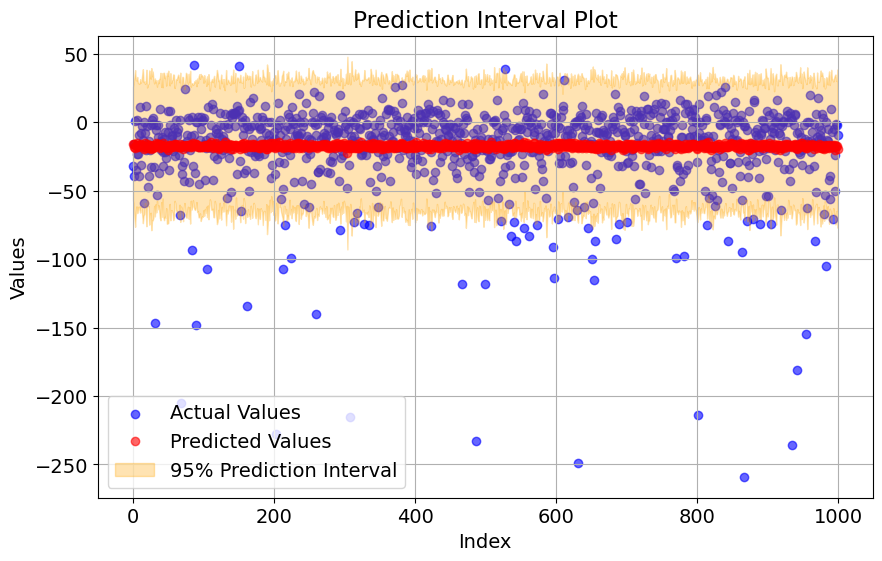

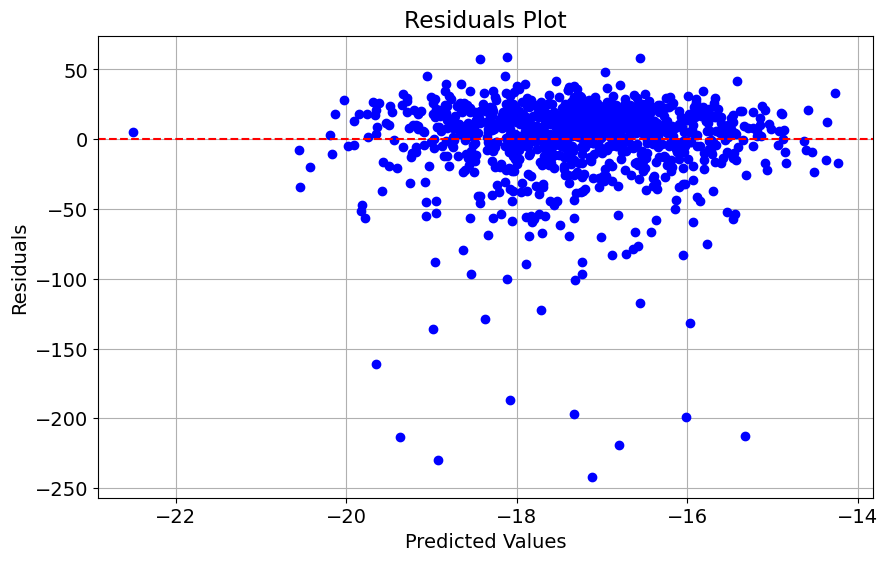

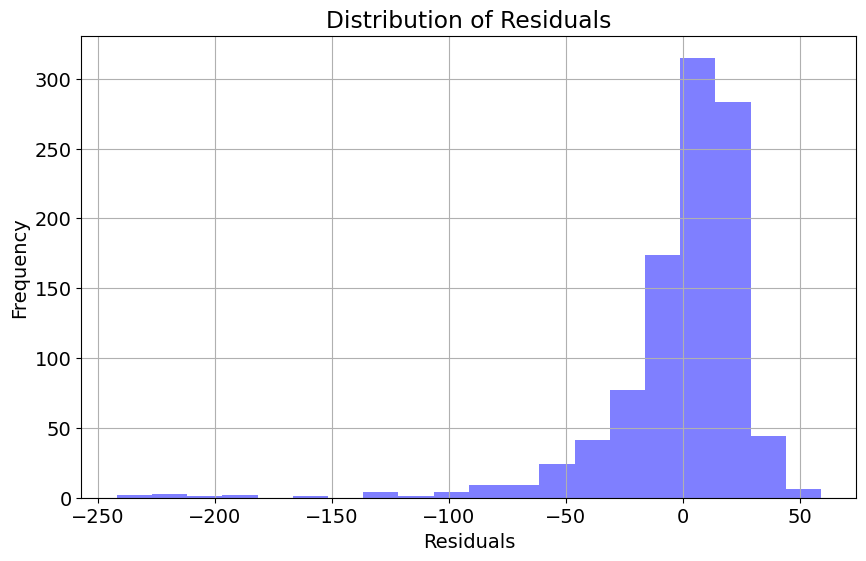

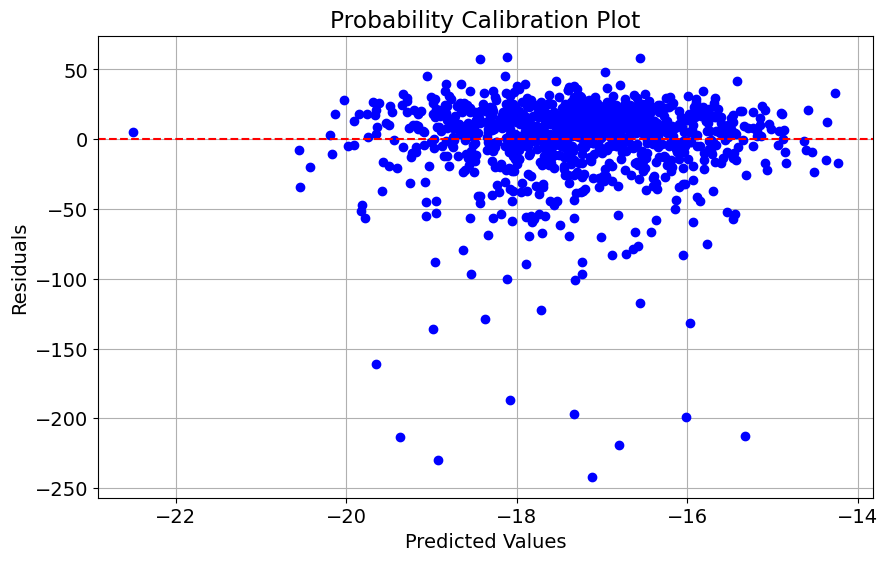

In [81]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Modify the plots to use only the first column of y_test and y_pred
y_test_first_column = y_test[:1000, 0]
y_pred_first_column = y_pred[:1000, 0]

import matplotlib.pyplot as plt
# Assuming y_test_first_column, y_pred_first_column, and sigma are already defined
# y_test_first_column: Actual values of the first column of y_test
# y_pred_first_column: Predicted values for the first column
# sigma: Standard deviation of the predictions (used for the prediction interval)
# Create the plot
plt.figure(figsize=(10, 6))
# Scatter plot of actual vs. predicted values
plt.scatter(range(len(y_test_first_column)), y_test_first_column, color='blue', label='Actual Values', alpha=0.6)
# Plot the predicted values
plt.plot(range(len(y_test_first_column)), y_pred_first_column, 'ro', label='Predicted Values', alpha=0.6)
# Plot the 95% prediction interval
plt.fill_between(
    range(len(y_test_first_column)),
    y_pred_first_column - 1.96 * sigma[:len(y_test_first_column), 0],
    y_pred_first_column + 1.96 * sigma[:len(y_test_first_column), 0],
    color='orange', alpha=0.3, label='95% Prediction Interval'
)
# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Prediction Interval Plot')
# Add legend
plt.legend()
# Add grid for better readability
plt.grid(True)
# Save the plot to a file
plt.savefig('prediction_interval_plot.png')
# Show the plot
plt.show()


# Residuals Plot
residuals = y_test_first_column - y_pred_first_column
plt.figure(figsize=(10, 6))
plt.plot(y_pred_first_column, residuals, 'bo')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True)
plt.savefig('residuals_plot.png')
plt.show()

# Distribution of Residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, alpha=0.5, color='blue')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.savefig('distribution_of_residuals.png')
plt.show()

# Probability Calibration Plot
plt.figure(figsize=(10, 6))
plt.plot(y_pred_first_column, residuals, 'bo')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Probability Calibration Plot')
plt.grid(True)
plt.savefig('probability_calibration_plot.png')
plt.show()


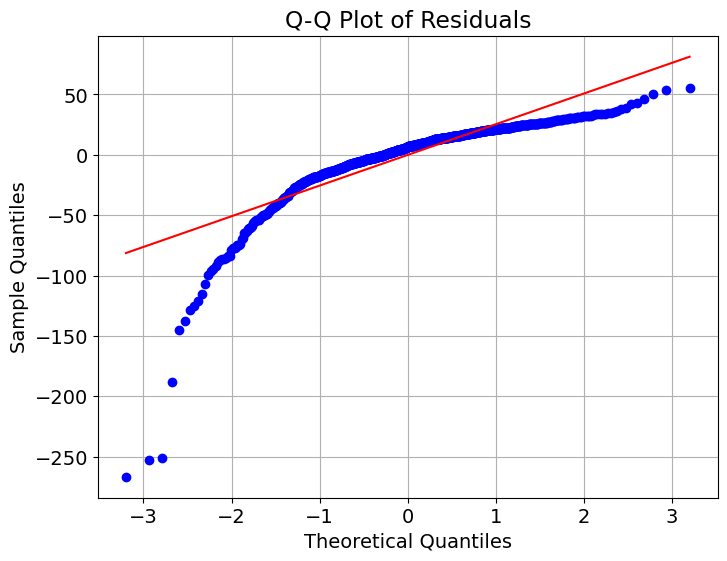

In [49]:
import scipy.stats as stats

# Generate Q-Q plot of residuals against a normal distribution
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.savefig('Q-Q_residuals_plot.png')
plt.show()


Mean Absolute Error (MAE): 18.929759138589894
Mean Squared Error (MSE): 864.187683845157


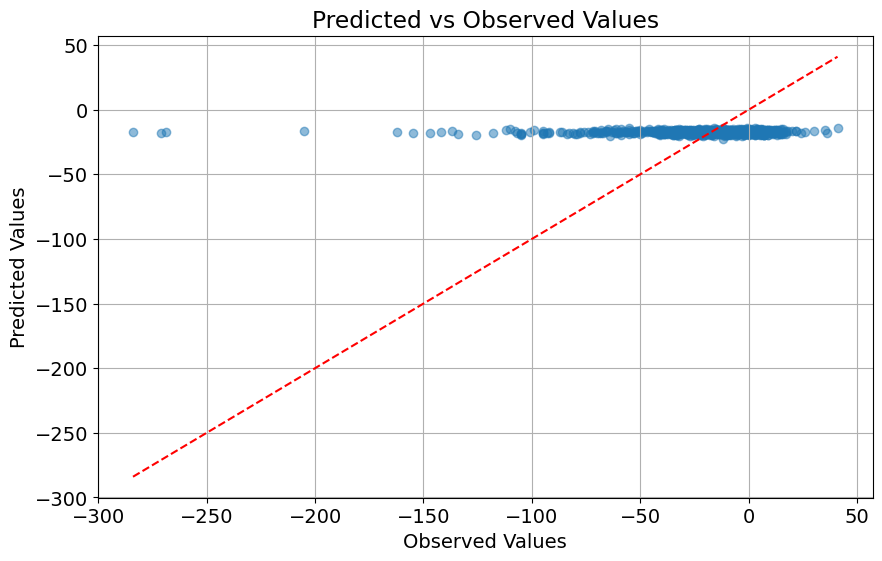

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate calibration error metrics
mae = mean_absolute_error(y_test_first_column, y_pred_first_column)
mse = mean_squared_error(y_test_first_column, y_pred_first_column)

# Print calibration error metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')

# Visualize predicted vs observed values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_first_column, y_pred_first_column, alpha=0.5)
plt.plot([min(y_test_first_column), max(y_test_first_column)], [min(y_test_first_column), max(y_test_first_column)], color='red', linestyle='--')
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Observed Values')
plt.grid(True)
plt.show()


In [33]:
## It only works with the latest tensorflow version. So, to reproduce, rerun the notebook using the latest tensorflow instead of 2.14.0

import numpy as np
import plotly.graph_objects as go

# Load predictions and uncertainties from CSV files
y_pred = np.loadtxt('/kaggle/input/uq-files/y_pred.csv', delimiter=',')
sigma = np.loadtxt('/kaggle/input/uq-files/sigma.csv', delimiter=',')

import plotly.express as px

# Create the scatter plot
fig = px.scatter(x=y_test[:2000,0], y=y_pred[:2000,0], trendline='ols', trendline_color_override='red')

# Add error bars with green color
fig.add_trace(go.Scatter(x=y_test[:100,0], y=y_pred[:100,0], 
                         error_y=dict(type='data', array=sigma[:100,0]), 
                         mode='markers', marker=dict(color='blue'), 
                         error_y_color='orange', name='Dst Index'))

# Define the upper and lower bounds for the shaded band
upper_bound = y_pred[:100, 0] + sigma[:100, 0]
lower_bound = y_pred[:100, 0] - sigma[:100, 0]

# Add the shaded band for uncertainty
fig.add_traces(go.Scatter(x=np.concatenate([y_test[:2000, 0], y_test[:2000, 0][::-1]]),
                          y=np.concatenate([upper_bound, lower_bound[::-1]]),
                          fill='toself', fillcolor='rgba(0,100,80,0.2)',
                          line=dict(color='rgba(255,255,255,0)'),
                          name='Uncertainty Band'))

# Set the axes labels and title
fig.update_layout(
    xaxis_title="Actual (scaled)",
    yaxis_title="Predicted (scaled)",
    title="Regression Plot with Uncertainty",
    font=dict(
    size=18  # Set the font size
)
)

# Show the plot
fig.show()


## Crepes Analysis

https://crepes.readthedocs.io/en/latest/crepes_nb.html#Another-view-of-the-medians-and-prediction-intervals

In [52]:
import numpy as np

# Assuming your train and test datasets are loaded and preprocessed appropriately
# Define the function to flatten the datasets for MAPIE compatibility
def flatten_dataset(dataset):
    X, y = [], []
    for X_batch, y_batch in dataset:
        X.append(X_batch.numpy().reshape(-1, X_batch.shape[-1]))
        y.append(y_batch.numpy().reshape(-1, y_batch.shape[-1]))
    return np.vstack(X), np.vstack(y)

# Flatten the datasets
X_train_flat, y_train = flatten_dataset(train_ds)
X_test_flat, y_test = flatten_dataset(test_ds)
X_val_flat, y_val = flatten_dataset(val_ds)

# Reshape X_train, X_test, and X_val to have the same number of rows as y_train, y_test, and y_val
# Assuming the timestep used is 128
timestep = 128

# Reshape by multiplying the number of rows by the timestep
X_train = X_train_flat.reshape(-1, timestep * X_train_flat.shape[1])
X_test = X_test_flat.reshape(-1, timestep * X_test_flat.shape[1])
X_val = X_val_flat.reshape(-1, timestep * X_val_flat.shape[1])

# Check the shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (137815, 3712)
y_train shape: (137815, 2)
X_test shape: (38278, 3712)
y_test shape: (38278, 2)
X_val shape: (18373, 3712)
y_val shape: (18373, 2)


In [53]:
!pip install crepes 

from crepes import ConformalPredictiveSystem
from crepes.extras import DifficultyEstimator 

In [54]:
valY_pred = model.predict(val_ds)
testY_pred = model.predict(test_ds)
trainY_pred = model.predict(train_ds)

181/181 [==============================] - 63s 343ms/step


In [57]:
testY_pred[:1000, 0]

array([-2.59706584e+01, -1.23490767e+01, -9.86198465e+01,  6.67882194e+00,
        4.16318013e+00, -2.06017331e+01, -8.98703536e+00, -1.08872642e+01,
       -7.32902114e+01, -3.75206591e+01, -1.09972006e+01,  1.55984379e+01,
       -9.54455798e+00, -3.13909427e+01, -2.14898322e+01, -4.24241617e+01,
       -5.27846863e+00,  8.43405314e+00,  7.02851600e+00, -3.65658366e+01,
       -3.70256169e-01, -3.50995052e+01,  4.58079424e+00, -2.24263808e+01,
       -6.58706804e+01, -5.88830146e+01, -3.29125838e+01, -2.51369577e+01,
       -9.43055315e+01, -9.49274018e+00, -1.46241524e+01, -2.21132573e+01,
       -4.63061664e+01, -7.72564344e+00, -4.69608599e+01, -1.25150129e+01,
       -3.39661154e+01, -7.72660018e+00, -5.97612342e+01, -1.69046505e+01,
        7.40778880e+00, -8.64012579e+00, -1.73983531e+01,  3.00340996e+00,
       -6.08520808e+01, -4.59193022e+00,  4.06268781e+00, -1.63556030e+01,
       -6.73689214e+00,  1.14298656e+00, -1.81092808e+01, -7.76858469e+00,
       -5.72075361e+01, -

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from crepes import ConformalClassifier, ConformalRegressor, ConformalPredictiveSystem, __version__
from crepes.extras import hinge, margin, binning, DifficultyEstimator
print(f"crepes v. {__version__}")
np.random.seed(602211023)

learner_prop = model
X_cal = X_val[:1000]
y_hat_cal = valY_pred[:1000, 0]
y_hat_test = testY_pred[:1000, 0]
residuals_cal = y_val[:1000, 0]- valY_pred[:1000, 0]

# Let us create a conformal regressor.
cr_std = ConformalRegressor()
# We will use the residuals from the calibration set to fit the conformal regressor.
cr_std.fit(residuals_cal)
# We may now obtain prediction intervals from the point predictions for the test set; here using a confidence level of 99%.
intervals = cr_std.predict(y_hat_test, confidence=0.99)

display(intervals)
# We may request that the intervals are cut to exclude impossible values, 
# in this case below 0 and above 1; below we also use the default confidence level (95%), which further tightens the intervals.
intervals_std = cr_std.predict(y_hat_test) #, y_min=0, y_max=1 

display(intervals_std)
de_knn = DifficultyEstimator()

de_knn.fit(X=X_train[:1000], scaler=True)

display(de_knn)

sigmas_cal_knn_dist = de_knn.apply(X_cal)

cr_norm_knn_dist = ConformalRegressor()

cr_norm_knn_dist.fit(residuals_cal, sigmas=sigmas_cal_knn_dist)

display(cr_norm_knn_dist)
sigmas_test_knn_dist = de_knn.apply(X_test[:1000])

intervals_norm_knn_dist = cr_norm_knn_dist.predict(y_hat_test,
                                                   sigmas=sigmas_test_knn_dist) # y_min=0, y_max=1

display(intervals_norm_knn_dist)
de_knn_std = DifficultyEstimator()

de_knn_std.fit(X=X_train[:1000], y=y_train[:1000, 0], scaler=True)

display(de_knn_std)

sigmas_cal_knn_std = de_knn_std.apply(X_cal)

cr_norm_knn_std = ConformalRegressor()

cr_norm_knn_std.fit(residuals_cal, sigmas=sigmas_cal_knn_std)

display(cr_norm_knn_std)
sigmas_test_knn_std = de_knn_std.apply(X_test[:1000])

intervals_norm_knn_std = cr_norm_knn_std.predict(y_hat_test,
                                                 sigmas=sigmas_test_knn_std) # y_min=0, y_max=1

display(intervals_norm_knn_std)
oob_predictions = trainY_pred[:1000, 0]

residuals_oob = y_train[:1000, 0] - oob_predictions

de_knn_res = DifficultyEstimator()

de_knn_res.fit(X=X_train[:1000], residuals=residuals_oob, scaler=True)

display(de_knn_res)

sigmas_cal_knn_res = de_knn_res.apply(X_cal)

cr_norm_knn_res = ConformalRegressor()

cr_norm_knn_res.fit(residuals_cal, sigmas=sigmas_cal_knn_res)

display(cr_norm_knn_res)
sigmas_test_knn_res = de_knn_res.apply(X_test[:1000])

intervals_norm_knn_res = cr_norm_knn_res.predict(y_hat_test,
                                                 sigmas=sigmas_test_knn_res) # y_min=0, y_max=1

display(intervals_norm_knn_res)

de_var = DifficultyEstimator()

de_var.fit(X=X_train[:1000], scaler=True)

display(de_var)

sigmas_cal_var = de_var.apply(X_cal)

cr_norm_var = ConformalRegressor()

cr_norm_var.fit(residuals_cal, sigmas=sigmas_cal_var)

display(cr_norm_var)

sigmas_test_var = de_var.apply(X_test[:1000])

intervals_norm_var = cr_norm_var.predict(y_hat_test,
                                         sigmas=sigmas_test_var) # y_min=0, y_max=1

display(intervals_norm_var)

'''
Mondrian conformal regressors
An alternative way of generating prediction intervals of varying size is to divide 
the object space into non-overlapping so-called Mondrian categories. 
A Mondrian conformal regressor is formed by providing the names of the 
categories as an additional argument, named bins, for the fit method.

Here we employ the helper function binning, imported from crepes.extras, which given a 
list/array of values returns an array of the same length with the assigned bins. 
If the optional argument bins is an integer, the function will divide the values into 
equal-sized bins and return both the assigned bins and the bin boundaries. 
If bins instead is a set of bin boundaries, the function will just return the assigned bins.

We can form the Mondrian categories in any way we like, as long as we only use 
information that is available for both calibration and test instances; this means 
that we may not use the target values for this purpose, since these will typically 
not be available for the test instances. We will form categories by binning of the 
difficulty estimates, here using the ones previously produced using the standard 
deviations of the nearest neighbor targets.
'''

bins_cal, bin_thresholds = binning(sigmas_cal_var, bins=20)

cr_mond = ConformalRegressor()

cr_mond.fit(residuals_cal, bins=bins_cal)

display(cr_mond)

# Let us now obtain the categories for the test instances using the same Mondrian categorization, i.e., bin borders.
bins_test = binning(sigmas_test_var, bins=bin_thresholds)
# now we can form prediction intervals for the test instances.
intervals_mond = cr_mond.predict(y_hat_test, bins=bins_test) # , y_min=0, y_max=1

display(intervals_mond)

'''
Let us create and fit standard and normalized conformal predictive systems, 
using the residuals from the calibration set (as obtained in the previous section). 
As can be seen, the input for fitting conformal predictive systems is on the same format as for the conformal regressors.
'''
cps_std = ConformalPredictiveSystem().fit(residuals_cal)

cps_norm = ConformalPredictiveSystem().fit(residuals_cal,
                                           sigmas=sigmas_cal_var)

'''
Let us also create some Mondrian CPS, but in contrast to the Mondrian conformal regressors above, 
we here form the categories through binning of the predictions rather than binning of the difficulty estimates. 
We may use the latter, i.e., the sigmas, to obtain a normalized CPS for each category (bin).
'''
bins_cal, bin_thresholds = binning(y_hat_cal, bins=5)

cps_mond_std = ConformalPredictiveSystem().fit(residuals_cal,
                                               bins=bins_cal)

cps_mond_norm = ConformalPredictiveSystem().fit(residuals_cal,
                                                sigmas=sigmas_cal_var,
                                                bins=bins_cal)

'''
For the normalized approaches, we already have the difficulty estimates which are needed for the test instances. 
For the Mondrian approaches, we also need to assign the new categories to the test instances.
'''
bins_test = binning(y_hat_test, bins=bin_thresholds)

'''
The output of the predict method of a ConformalPredictiveSystem will depend on how we specify the input. 
If we provide specific target values (using the parameter y), the method will output a p-value for each test instance, 
i.e., the probability that the true target is less than or equal to the provided values. 
The method assumes that either one value is provided for each test instance or that the same (single) value is provided for all test instances.

Here we will obtain the p-values from cps_mond_norm for the true targets of the test set
'''
p_values = cps_mond_norm.predict(y_hat_test,
                                 sigmas=sigmas_test_knn_res,
                                 bins=bins_test,
                                 y=y_test[:1000,0])

display(p_values)


'''
If we instead would like to get threshold values, with a specified probability that the 
true target is less than the threshold for each test instance, we may instead provide percentiles 
as input to the predict method. This is done through the parameter lower_percentiles, 
which denotes (one or more) percentiles for which a lower value will be selected in case 
a percentile lies between two values (similar to interpolation="lower" in numpy.percentile), 
or using higher_percentiles, which denotes (one or more) percentiles for which a higher value 
will be selected in such cases (similar to interpolation="higher" in numpy.percentile).

Here we will obtain the lowest values from cps_mond_norm, such that the probability for the target values being less than these is at least 50%

'''
thresholds = cps_mond_norm.predict(y_hat_test,
                                   sigmas=sigmas_test_knn_res,
                                   bins=bins_test,
                                   higher_percentiles=50)

display(thresholds)

'''
We can also specify both target values and percentiles; the resulting p-values will be returned in the first column, 
while any values corresponding to the lower percentiles will be included in the subsequent columns, 
followed by columns containing the values corresponding to the higher percentiles. The following call hence results in an array with five columns
'''
results = cps_mond_norm.predict(y_hat_test,
                                sigmas=sigmas_test_knn_res,
                                bins=bins_test,
                                y=y_test[:1000,0],
                                lower_percentiles=[2.5, 5],
                                higher_percentiles=[95, 97.5])

display(results)


'''
In addition to p-values and threshold values, we can request that the predict method returns the full 
conformal predictive distribution (CPD) for each test instance, as defined by the threshold values, 
by setting return_cpds=True. The format of the distributions vary with the type of conformal predictive system; 
for a standard and normalized CPS, the output is an array with a row for each test instance and a column for 
each calibration instance (residual), while for a Mondrian CPS, the default output is a vector containing 
one CPD per test instance (since the number of values may vary between categories). 
If the desired output instead is an array of distributions per category, where all distributions in a 
category have the same number of columns, which in turn depends on the number of calibration instances 
in the corresponding category, then cpds_by_bins=True may be specified. In case return_cpds=True is specified 
together with y, lower_percentiles or higher_percentiles, the output of predict will be a pair, with the first 
element holding the results of the above type and the second element will contain the CPDs.

For the above Mondrian CPS, the following call to predict will result in a vector of distributions, with one element for each test instance.

'''
cpds = cps_mond_norm.predict(y_hat_test,
                             sigmas=sigmas_test_knn_res,
                             bins=bins_test,
                             return_cpds=True)

print(f"No. of test instances: {len(y_hat_test)}")
print(f"Shape of cpds: {cpds.shape}")

crepes v. 0.6.2


array([[-197.22403906,  145.28272223],
       [-183.60245733,  158.90430397],
       [-269.87322718,   72.63353411],
       ...,
       [-184.74067699,  157.76608431],
       [-170.89331204,  171.61344925],
       [-170.31641604,  172.19034525]])

array([[-108.17419226,   56.23287543],
       [ -94.55261053,   69.85445716],
       [-180.82338038,  -16.41631269],
       ...,
       [ -95.69083019,   68.7162375 ],
       [ -81.84346524,   82.56360245],
       [ -81.26656924,   83.14049845]])

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7cd62a0983a0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 584, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 725, in _make_controller_from_path
    lib_controller = lib_controller_class(
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 842, in __init__
    super().__init__(**kwargs)
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 810, in __init__
    self._dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/opt/conda/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /opt/conda/lib/python3.10/site-packages/numpy.libs/libopenblas64_p-r0-742d56dc.3.20.so: cann

DifficultyEstimator(fitted=True, type=knn, k=25, target=none, scaler=True, beta=0.01, oob=False)

ConformalRegressor(fitted=True, normalized=True, mondrian=False)

array([[-146.64382907,   94.70251224],
       [-122.96826634,   98.27011298],
       [-182.39791913,  -14.84177394],
       ...,
       [-115.12114811,   88.14655542],
       [ -98.60251729,   99.3226545 ],
       [ -68.47230673,   70.34623594]])

DifficultyEstimator(fitted=True, type=knn, k=25, target=labels, scaler=True, beta=0.01, oob=False)

ConformalRegressor(fitted=True, normalized=True, mondrian=False)

array([[-121.32011668,   69.37879984],
       [ -84.31967079,   59.62151743],
       [-196.12040501,   -1.11928806],
       ...,
       [ -60.64939374,   33.67480106],
       [ -65.94847099,   66.6686082 ],
       [ -90.59948683,   92.47341604]])

DifficultyEstimator(fitted=True, type=knn, k=25, target=residuals, scaler=True, beta=0.01, oob=False)

ConformalRegressor(fitted=True, normalized=True, mondrian=False)

array([[-118.77830792,   66.83699109],
       [-117.87315668,   93.17500332],
       [-252.63856945,   55.39887638],
       ...,
       [-158.70235853,  131.72776585],
       [-171.66665055,  172.38678776],
       [ -96.48388848,   98.35781769]])

DifficultyEstimator(fitted=True, type=knn, k=25, target=none, scaler=True, beta=0.01, oob=False)

ConformalRegressor(fitted=True, normalized=True, mondrian=False)

array([[-146.64382907,   94.70251224],
       [-122.96826634,   98.27011298],
       [-182.39791913,  -14.84177394],
       ...,
       [-115.12114811,   88.14655542],
       [ -98.60251729,   99.3226545 ],
       [ -68.47230673,   70.34623594]])

ConformalRegressor(fitted=True, normalized=False, mondrian=True)

array([[-123.0286075 ,   71.08729067],
       [-100.88397369,   76.18582033],
       [-188.07861563,   -9.16107744],
       ...,
       [-182.44886302,  155.47427034],
       [-168.60149807,  169.32163529],
       [-102.37954561,  104.25347482]])

array([1.29314047e-01, 4.28251172e-01, 6.39397410e-01, 7.10464194e-01,
       1.22520480e-01, 9.25933701e-01, 3.86975903e-02, 2.72540565e-01,
       8.55104396e-01, 1.07248648e-01, 8.78693227e-01, 1.13169712e-01,
       5.78759600e-01, 8.30531780e-01, 6.66113954e-01, 5.09232443e-01,
       5.14303272e-02, 3.60495103e-01, 1.83844932e-01, 6.52415356e-01,
       7.69275751e-01, 7.88029263e-02, 1.21077187e-02, 6.62250663e-01,
       7.22147722e-01, 6.98779714e-01, 8.07203060e-01, 6.03931482e-01,
       9.33653960e-01, 6.70277012e-01, 4.42354486e-02, 3.39744783e-04,
       7.15862050e-01, 6.71427356e-01, 8.96010216e-02, 7.89340927e-01,
       8.68302338e-01, 8.86543115e-02, 8.29052487e-01, 5.95588128e-01,
       1.29488210e-01, 4.80999949e-01, 1.27589989e-01, 2.57131809e-01,
       7.16150371e-01, 7.33531858e-01, 2.59667133e-01, 1.71932526e-01,
       4.98197417e-02, 8.98374310e-01, 8.94886490e-01, 8.63384372e-02,
       7.14880862e-01, 7.43987150e-01, 6.83402048e-01, 4.45553658e-01,
      

array([-1.67905577e+01, -1.37795101e+01, -5.92654493e+01, -8.23486587e+00,
       -7.96790761e+00, -2.05848856e+01, -9.45026308e+00, -1.28045050e+01,
       -5.29274710e+01, -1.04743749e+01, -1.25873145e+01,  1.38431306e+00,
       -1.14485831e+01, -2.15156016e+01, -2.14594551e+01, -1.86014357e-01,
       -1.71397498e+01, -4.42810216e+00, -5.03122482e+00, -5.95310852e+00,
       -1.88754208e+01,  3.95280043e-01, -1.09424558e+00, -2.23963166e+01,
       -4.33971144e+01, -4.45919455e+01, -2.14388893e+01, -5.88507895e+00,
       -7.34216345e+01, -1.17346920e+01, -1.53265764e+01, -2.20873891e+01,
       -2.54491762e+01, -9.25686460e+00, -3.55718724e+00, -1.39016602e+01,
       -2.68937951e+01, -9.68549320e+00, -3.38984931e+01, -1.68822161e+01,
       -2.54735777e+00, -1.03237972e+01, -1.73759538e+01, -1.05462405e+01,
       -3.56373698e+01, -1.33140805e+01, -1.07314955e+01, -1.63360657e+01,
       -7.49890611e+00, -1.22290309e+01, -1.80957892e+01, -9.61089246e+00,
       -2.35945861e+01, -

array([[ 1.28697326e-01, -5.01316950e+01, -3.97262234e+01,
         2.02020255e+01,  3.13990146e+01],
       [ 4.32257183e-01, -6.96313941e+01, -4.18023607e+01,
         1.77113298e+01,  2.61833069e+01],
       [ 6.38324343e-01, -1.94602154e+02, -1.30612662e+02,
         1.49101056e+02,  2.04357753e+02],
       ...,
       [ 7.61141127e-01, -9.23153258e+01, -5.40189027e+01,
         2.78797906e+01,  3.95383493e+01],
       [ 7.67228547e-01, -1.13018409e+02, -1.01691706e+02,
         1.98474455e+01,  3.59767117e+01],
       [ 5.71425490e-01, -6.32706660e+01, -5.68562140e+01,
         1.19729065e+01,  2.11071089e+01]])

No. of test instances: 1000
Shape of cpds: (1000,)


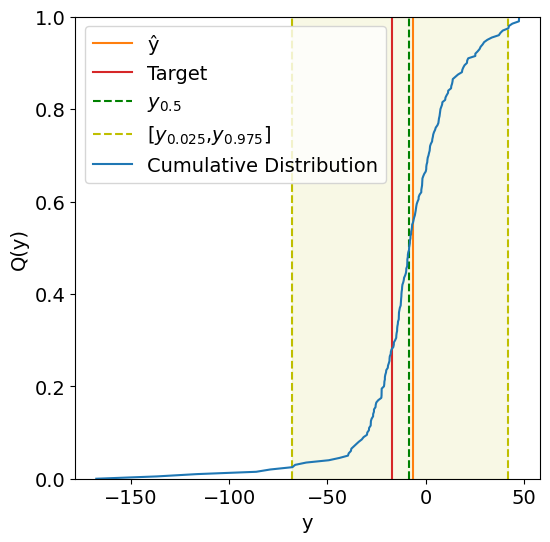

In [63]:
'''
We may also plot the conformal predictive distribution for some test object. In case the calibration set is very large, 
you may consider plotting an approximation of the full distribution by using a grid of values for lower_percentiles 
or higher_percentiles, instead of setting return_cpds=True. For the Mondrian CPS, the size of the calibration set for 
each bin is reasonable in this case, so we may just use the distributions directly.

'''


y_hat_full = y_hat_test
cpds = cps_mond_norm.predict(y_hat_full,
                                 bins=bins_test,
                                 sigmas=sigmas_test_var,
                                 return_cpds=True)

test_index = np.random.randint(len(y_hat_full)) # A test object is randomly selected
cpd = cpds[test_index]

p = np.array([i/len(cpd) for i in range(len(cpd))])

lower_index = np.where(p<=0.025)[0][-1]
mid_index = np.where(p>=0.50)[0][0]
upper_index = np.where(p>=0.975)[0][0]

low_percentile = cpd[lower_index]
median = cpd[mid_index]
high_percentile = cpd[upper_index]

plt.figure(figsize=(6,6))

plt.xlabel("y")
plt.ylabel("Q(y)")
plt.ylim(0,1)

plt.plot([y_hat_full[test_index],y_hat_full[test_index]],[0,1], color="tab:orange", label="ŷ")
plt.plot([y_test[:,0][test_index],y_test[:,0][test_index]],[0,1], color="tab:red", label='Target')
plt.plot([median,median],[0,1],"g--",label="$y_{0.5}$")
plt.plot([low_percentile,low_percentile],[0,1],"y--",label="[$y_{0.025}$,$y_{0.975}$]")
plt.plot([high_percentile,high_percentile],[0,1],"y--")
plt.plot(cpd,p, color="tab:blue", label='Cumulative Distribution')

rectangle = plt.Rectangle((low_percentile,0),
                          abs(high_percentile-low_percentile),1, color="y",
                          alpha=0.1)

# plt.legend(["ŷ","target","$y_{0.5}$","[$y_{0.025}$,$y_{0.975}$]"])

plt.legend(loc='upper left')
plt.gca().add_patch(rectangle)
plt.savefig('conformal_predictive_distribution.png')
plt.show()

In [64]:
# Let us put all the generated CPS in a dictionary.

all_cps = {"Standard CPS":cps_std,
           #"Std OOB CPS":cps_std_oob,
           "Normalized CPS":cps_norm,
           #"Norm OOB CPS":cps_norm_oob,
           "Mondrian CPS":cps_mond_std,
           #"Mond OOB CPS":cps_mond_std_oob,
           "Mondrian Normalized CPS":cps_mond_norm,
           #"Mond norm OOB CPS":cps_mond_norm_oob
          }

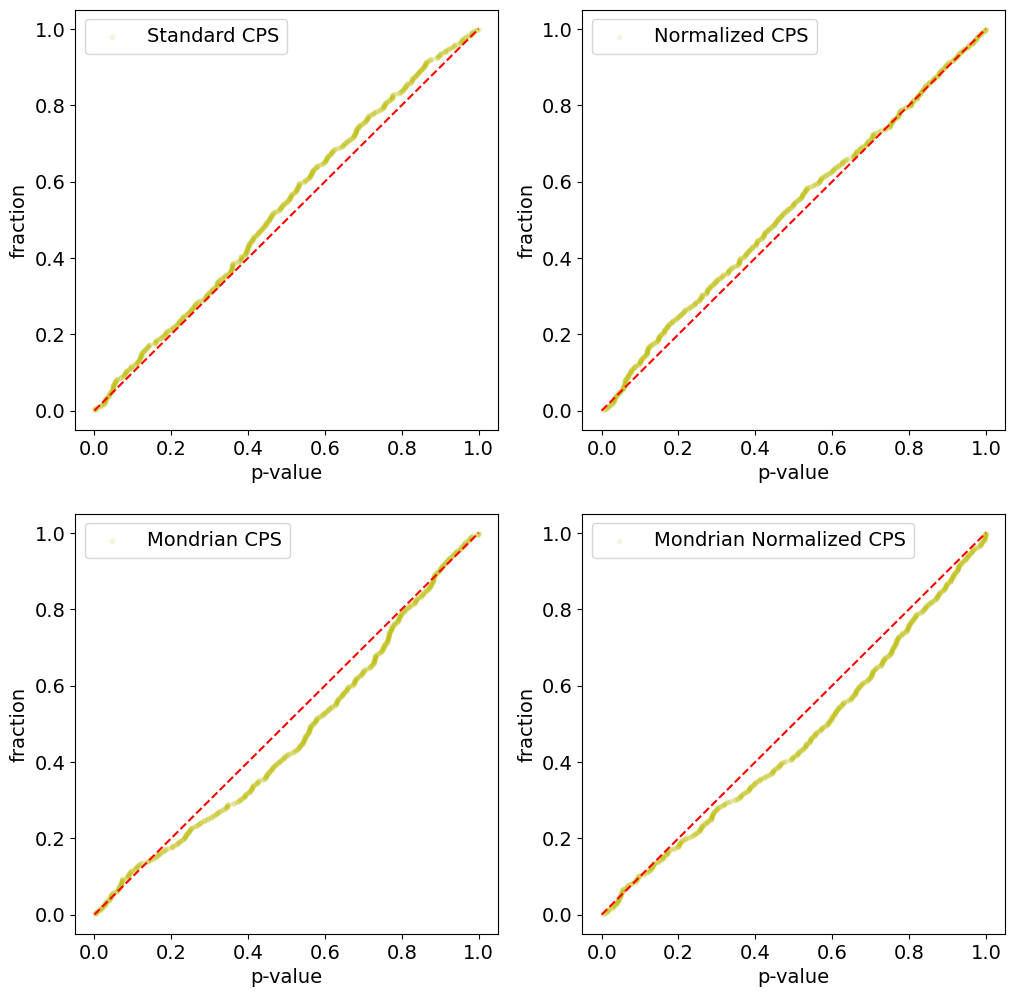

In [65]:
# Now we will check if the p-values for the test targets seem to be uniformly distributed.

plt.subplots(len(all_cps.keys())//2,2,figsize=(12,12))

for i, name in enumerate(all_cps.keys()):

    if "OOB" in name:
        p_values = all_cps[name].predict(y_hat_full,
                                         sigmas=sigmas_test_var_oob,
                                         bins=bins_test_oob,
                                         y=y_test[:1000,0])
    else:
        p_values = all_cps[name].predict(y_hat_test,
                                         sigmas=sigmas_test_var,
                                         bins=bins_test,
                                         y=y_test[:1000,0])

    plt.subplot(len(all_cps.keys())//2,2,i+1)

    plt.scatter(np.sort(p_values),
                [(i+1)/len(y_test[:1000,0]) for i in range(len(y_test[:1000,0]))],
                label=name, c="y", marker=".", alpha=0.1)

    plt.plot([0,1],[0,1],"r--")
    plt.legend()
    plt.ylabel("fraction")
    plt.xlabel("p-value")

plt.savefig('Analyzing_the_p-values.png')
plt.show()

In [70]:
all_cps_intervals[name][:,0] - all_cps_intervals[name][:,1]

array([-1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.  

,Coverage,Mean size,Median size
Standard CPS,0.9620,177.6319,177.6319
Normalized CPS,0.9570,207.3074,200.8778
Mondrian CPS,0.9590,142.2291,136.6359
Mondrian Normalized CPS,0.9440,159.8008,129.0947
Mean,0.9555,171.7423,161.0601


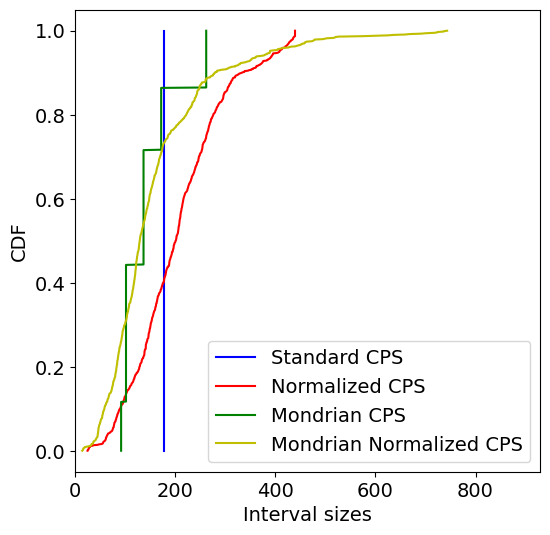

In [78]:
all_cps_intervals = {}

coverages = []
mean_sizes = []
median_sizes = []

for name in all_cps.keys():
    if "OOB" in name:
        intervals = all_cps[name].predict(y_hat_full,
                                          sigmas=sigmas_test_var_oob,
                                          bins=bins_test_oob,
                                          lower_percentiles=2.5,
                                          higher_percentiles=97.5) #  y_min=0, y_max=1
    else:
        intervals = all_cps[name].predict(y_hat_test,
                                          sigmas=sigmas_test_var,
                                          bins=bins_test,
                                          lower_percentiles=2.5,
                                          higher_percentiles=97.5) #  y_min=0, y_max=1
    all_cps_intervals[name] = intervals
    coverages.append(np.sum([1 if (y_test[:1000,0][i]>=intervals[i,0] and
                                   y_test[:1000,0][i]<=intervals[i,1]) else 0
                            for i in range(len(y_test[:1000,0]))])/len(y_test[:1000,0]))
    mean_sizes.append((intervals[:,1]-intervals[:,0]).mean())
    median_sizes.append(np.median((intervals[:,1]-intervals[:,0])))

pred_int_df = pd.DataFrame({"Coverage":coverages,
                            "Mean size":mean_sizes,
                            "Median size":median_sizes},
                           index=list(all_cps_intervals.keys()))

pred_int_df.loc["Mean"] = [pred_int_df["Coverage"].mean(),
                           pred_int_df["Mean size"].mean(),
                           pred_int_df["Median size"].mean()]

display(pred_int_df.round(4))

cps_interval_sizes = {}

for name in all_cps_intervals.keys():
    cps_interval_sizes[name] = \
    all_cps_intervals[name][:,1] - all_cps_intervals[name][:,0]

plt.figure(figsize=(6,6))
plt.ylabel("CDF")
plt.xlabel("Interval sizes")
plt.xlim(0,cps_interval_sizes["Mondrian Normalized CPS"].max()*1.25)

colors = ["b","r","g","y","k","m", "gray", "orange"]

for i, name in enumerate(cps_interval_sizes.keys()):
    if "Std" in name:
        style = "dotted"
    else:
        style = "solid"
    plt.plot(np.sort(cps_interval_sizes[name]),
             [i/len(cps_interval_sizes[name])
              for i in range(1,len(cps_interval_sizes[name])+1)],
             linestyle=style, c=colors[i], label=name)

plt.legend()
plt.savefig('distributions_of_prediction_intervals.png')
plt.show()

Standard CPS
	Mean difference of the medians:    0.035748
	Largest difference of the medians: 0.035748
Normalized CPS
	Mean difference of the medians:    0.165673
	Largest difference of the medians: 0.351103
Mondrian CPS
	Mean difference of the medians:    0.236601
	Largest difference of the medians: 0.304795
Mondrian Normalized CPS
	Mean difference of the medians:    0.080848
	Largest difference of the medians: 0.554068


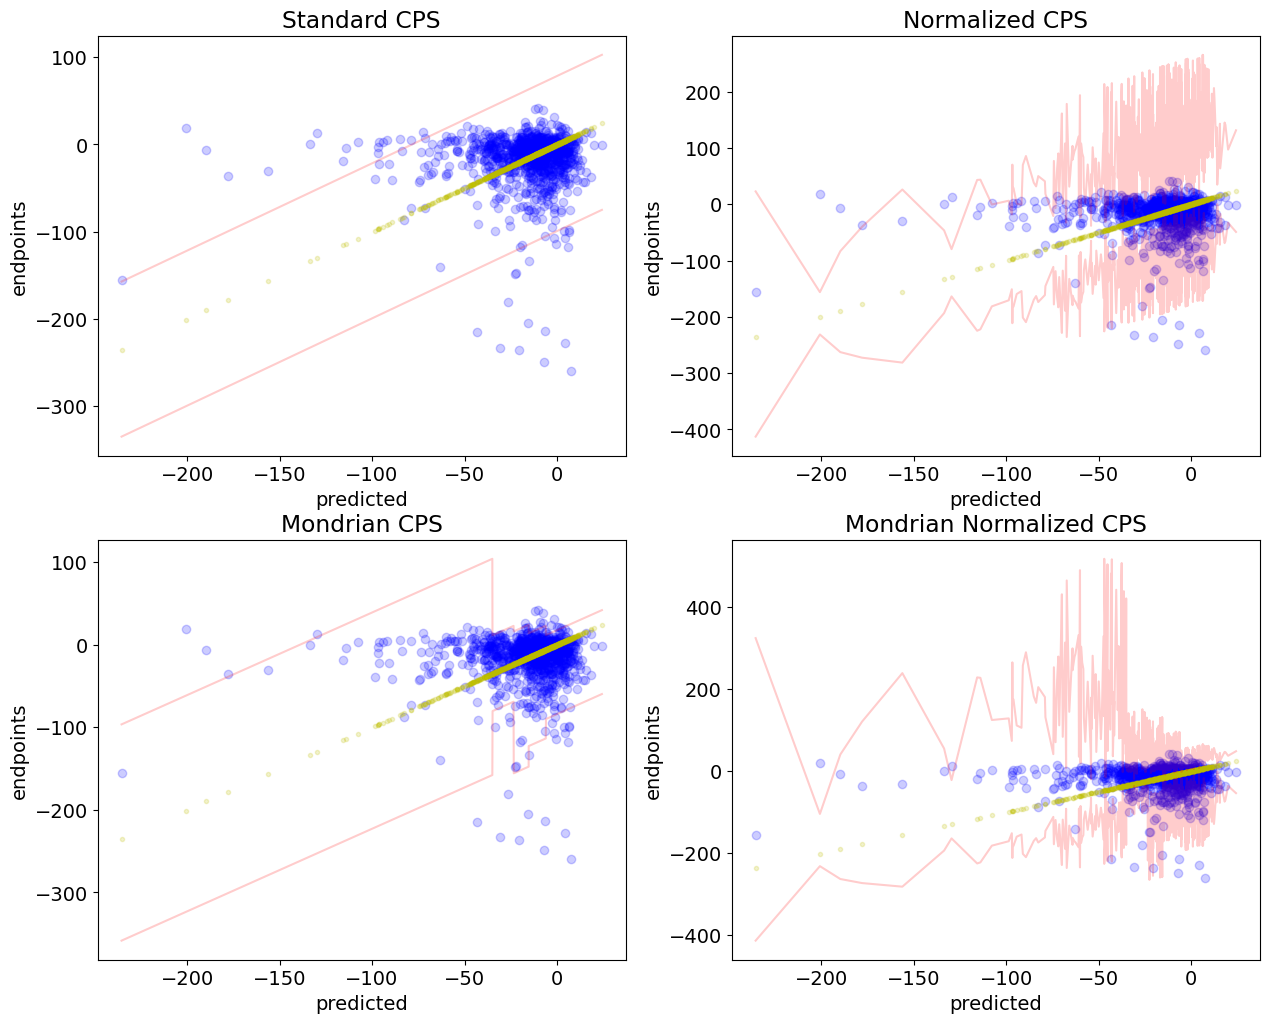

In [79]:
'''
Extracting medians: Let us take a look at the medians; they can be derived using either lower or higher interpolation, but ideally the differences should be small.

Another view of the medians and prediction intervals
'''

all_cps_medians = {}

for name in all_cps.keys():
    if "OOB" in name:
        medians = all_cps[name].predict(y_hat_full,
                                        sigmas=sigmas_test_var_oob,
                                        bins=bins_test_oob,
                                        lower_percentiles=50,
                                        higher_percentiles=50)
    else:
        medians = all_cps[name].predict(y_hat_test,
                                        sigmas=sigmas_test_var,
                                        bins=bins_test,
                                        lower_percentiles=50,
                                        higher_percentiles=50)
    all_cps_medians[name] = medians
    print(name)
    print("\tMean difference of the medians:    {:.6f}".format((medians[:,1]-medians[:,0]).mean()))
    print("\tLargest difference of the medians: {:.6f}".format((medians[:,1]-medians[:,0]).max()))

plt.subplots(len(all_cps_intervals.keys())//2,2,figsize=(15,12))

sorted_prop_indexes = np.argsort(y_hat_test)

sorted_full_indexes = np.argsort(y_hat_full)

alpha=0.2

for i, name in enumerate(all_cps_intervals.keys()):

    plt.subplot(len(all_cps_intervals.keys())//2,2,i+1)
    if "OOB" in name:
        indexes = sorted_full_indexes
        y_hat_ = y_hat_full
    else:
        indexes = sorted_prop_indexes
        y_hat_ = y_hat_test

    plt.title(name)
    plt.plot(y_hat_[indexes], all_cps_intervals[name][indexes,0],
             color="r", alpha=alpha)
    plt.plot(y_hat_[indexes], all_cps_intervals[name][indexes,1],
             color="r", alpha=alpha)
    plt.scatter(y_hat_[indexes],y_test[:,0][indexes],
                color="b", marker="o", alpha=alpha)
    plt.scatter(y_hat_[indexes],y_hat_[indexes],
                color="y", marker=".", alpha=alpha)
    plt.xlabel("predicted")
    plt.ylabel("endpoints")

plt.savefig('medians_and_prediction_intervals.png')
plt.show()

# ShapTIme

In [54]:
# @title
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Dropout, Bidirectional


# create super-time
def supertime(Tn, data):

    dfx = []
    lenth = int(len(data)/Tn)
    start = len(data) - (lenth * Tn)

    data_s = data[start:, :, :]

    for i in range(Tn):
        Ti = data_s[ i*lenth : (i+1)*lenth, :, : ]
        dfx.append(Ti)

    return dfx

def supertime_add(Tn, data):

    dfx = []
    lenth = int(len(data)/Tn)
    start = len(data) - (lenth * Tn)

    data_s = data.iloc[start: , :]

    for i in range(Tn):
        Ti = data_s.iloc[ i*lenth : (i+1)*lenth ]
        dfx.append(Ti)

    return dfx


# create ShapTime
def get_sub_set(Tn):

    mylist = list(range(Tn))
    sub_sets = [[]]
    for x in mylist:
        sub_sets.extend([item + [x] for item in sub_sets])
    return sub_sets


def ValFunction(model, interp_x, Tn):

    dfx = supertime(Tn, interp_x)
    # Generate subsets of indexes
    subset = get_sub_set(Tn)

    # Generate the baseline
    y_results = model.predict(interp_x)
    baseline = sum(y_results)/len(interp_x)

    val_results = []

    for i in range(1, len(subset)):
        x_i = dfx[subset[i][0]]

        if len(subset[i]) == 1:
            prediction = model.predict(x_i)
            results = (sum(prediction)/len(x_i)) - baseline
            val_results.append(results)

        else:
            for n in range(1, len(subset[i])):
                x_i = np.vstack([x_i, dfx[subset[i][n]]])

            prediction = model.predict(x_i)
            results = (sum(prediction)/len(x_i)) - baseline
            val_results.append(results)

    val_results.insert(0,0.0)

    return subset, val_results


def index(Si, subset):
    for i in range(len(subset)):
        if Si == subset[i]:
            index = i
        else:
            pass
    return index


def ShapleyValues(model, interp_x, Tn):

    subset, val_results = ValFunction(model, interp_x, Tn)
    shapley_values = []
    for i in range (Tn):
        shapley = []
        for n in range(len(subset)):
            if i not in subset[n]:
                Si = subset[n]+[i]
                Si.sort()
                Si_num = index(Si, subset)

                S_num = len(subset[n])
                N = Tn

                weight = (math.factorial(S_num) * math.factorial((N-S_num-1))) / math.factorial(N)
                val = val_results[Si_num] - val_results[n]
                shapley_i = weight * val

                shapley.append(shapley_i)
            else:
                pass

        shapley_values.append(sum(shapley))
        del shapley

    return shapley_values


def trans(original):
    results_exp = []
    for i in range(len(original)):
        results_exp.append(float(original[i]))
    return results_exp


def TimeImportance(Tn, ST_value, time_columns):
    time_list = list(range(Tn))
    shapley_impor = pd.DataFrame(index = time_list, columns = ['ShapTime'])
    shapley_impor['ShapTime'] = ST_value
    shapley_impor['absolute'] = abs(shapley_impor['ShapTime'])

    shapley_impor.index = time_columns
    shapley_impor.sort_values(by='absolute', inplace = True, ascending=False)

    sns.set(context='paper', style='ticks', font_scale=2)
    ax = sns.barplot(x="ShapTime", y=shapley_impor.index, data=shapley_impor, orient = 'h', color="lightskyblue", palette = 'Blues_r')
    plt.ylabel('Time Columns')
    plt.show()


def TimeHeatmap(Tn, ST_value, time_columns):
    time_list = list(range(Tn))
    shapley_df = pd.DataFrame(index = time_list, columns = ['ShapTime'])
    shapley_df['ShapTime'] = ST_value
    shapley_df_abs = abs(shapley_df)

    shapley_df_abs.index = time_columns
    sns.set(font_scale=1.3)
    f, ax = plt.subplots(figsize=(13, 1))
    sns.heatmap(shapley_df_abs.T, annot=False, linewidths=0, ax=ax, cmap = 'Blues')



In [55]:
y_pred = np.loadtxt('/kaggle/input/uq-files/y_pred.csv', delimiter=',')
prediction = y_pred

from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(prediction, y_test)
mse = mean_squared_error(prediction, y_test)
print(r2)
print(mse)

-11.434599412497487
399.20184595895944


In [59]:
import numpy as np

# Assuming your train and test datasets are loaded and preprocessed appropriately
# Define the function to flatten the datasets for MAPIE compatibility
def flatten_dataset(dataset):
    X, y = [], []
    for X_batch, y_batch in dataset:
        X.append(X_batch.numpy().reshape(-1, X_batch.shape[-1]))
        y.append(y_batch.numpy().reshape(-1, y_batch.shape[-1]))
    return np.vstack(X), np.vstack(y)

# Flatten the datasets
X_train_flat, y_train = flatten_dataset(train_ds)
X_test_flat, y_test = flatten_dataset(test_ds)
X_val_flat, y_val = flatten_dataset(val_ds)

# Reshape X_train, X_test, and X_val to have the same number of rows as y_train, y_test, and y_val
# Assuming the timestep used is 128
timestep = 128

# Reshape by multiplying the number of rows by the timestep
X_train = X_train_flat.reshape(-1, timestep, X_train_flat.shape[1])
X_test = X_test_flat.reshape(-1, timestep, X_test_flat.shape[1])
X_val = X_val_flat.reshape(-1, timestep, X_val_flat.shape[1])

# Check the shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (137815, 128, 29)
y_train shape: (137815, 2)
X_test shape: (38278, 128, 29)
y_test shape: (38278, 2)
X_val shape: (18373, 128, 29)
y_val shape: (18373, 2)


In [64]:
Tn= 10
interp_x= X_train[:1000]
ShapTime_lstm = ShapleyValues(model, interp_x, Tn)

32/32 [==============================] - 11s 328ms/step


In [72]:
ShapTime_lstm

[array([ 0.00104716, -0.02559597]),
 array([-0.73658821, -0.77184436]),
 array([-1.01112254, -1.01646499]),
 array([0.50336871, 0.58287127]),
 array([-0.16179079, -0.20638746]),
 array([-0.31771394, -0.29148409]),
 array([-0.6874278, -0.6706816]),
 array([0.76765977, 0.79557044]),
 array([0.38077839, 0.38828876]),
 array([1.26178926, 1.21572801])]

In [73]:
[arr[0] for arr in ShapTime_lstm]

[0.001047160222304093,
 -0.7365882093337732,
 -1.011122536603846,
 0.5033687059128817,
 -0.16179079434332155,
 -0.31771394099735906,
 -0.6874278036289204,
 0.7676597724825579,
 0.3807783910114724,
 1.2617892552780052]

In [66]:
time_columns =  ['t0', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9']
#time_columns =  ['t0', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8']

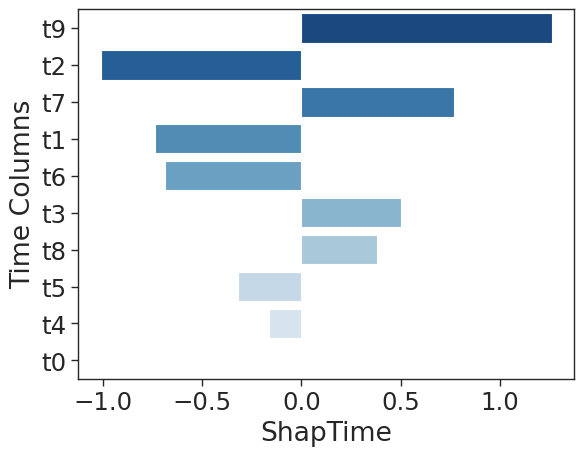

In [74]:
TimeImportance(Tn, trans([arr[0] for arr in ShapTime_lstm]), time_columns)

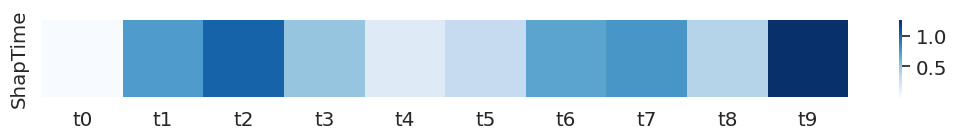

In [75]:
TimeHeatmap(Tn, trans([arr[0] for arr in ShapTime_lstm]), time_columns)